In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('/Users/sa12/Documents/Repositories/PredictPodcastListeningTime/PodcastData/train.csv')

In [3]:
shape = data.shape
data.head(15)

id     Podcast_Name Episode_Title  Episode_Length_minutes       Genre  \
0    0  Mystery Matters    Episode 98                     NaN  True Crime   
1    1    Joke Junction    Episode 26                  119.80      Comedy   
2    2   Study Sessions    Episode 16                   73.90   Education   
3    3   Digital Digest    Episode 45                   67.17  Technology   
4    4      Mind & Body    Episode 86                  110.51      Health   
5    5    Fitness First    Episode 19                   26.54      Health   
6    6   Criminal Minds    Episode 47                   69.83  True Crime   
7    7     News Roundup    Episode 44                   48.52        News   
8    8     Daily Digest    Episode 32                  105.87        News   
9    9    Music Matters    Episode 81                     NaN       Music   
10  10   Sports Central    Episode 66                  106.41      Sports   
11  11       Melody Mix    Episode 62                  107.26       Music   
12  12         Game Day    Episode 76                   82.14      Sports   
13  13      Gadget Geek    Episode 37                   92.50  Technology   
14  14      Global News    Episode 20                   81.45        News   

    Host_Popularity_percentage Publication_Day Publication_Time  \
0                        74.81        Thursday            Night   
1                        66.95        Saturday        Afternoon   
2                        69.97         Tuesday          Evening   
3                        57.22          Monday          Morning   
4                        80.07          Monday        Afternoon   
5                        48.96        Saturday        Afternoon   
6                        35.82          Sunday            Night   
7                        44.99        Thursday            Night   
8                        69.81          Monday          Evening   
9                        82.18        Thursday            Night   
10                       84.29        Thursday          Evening   
11                       78.12          Monday          Evening   
12                       86.65        Saturday          Morning   
13                       68.42       Wednesday        Afternoon   
14                       89.62        Saturday          Evening   

    Guest_Popularity_percentage  Number_of_Ads Episode_Sentiment  \
0                           NaN            0.0          Positive   
1                         75.95            2.0          Negative   
2                          8.97            0.0          Negative   
3                         78.70            2.0          Positive   
4                         58.68            3.0           Neutral   
5                           NaN            3.0          Positive   
6                         39.02            0.0           Neutral   
7                         20.12            0.0          Positive   
8                           NaN            2.0           Neutral   
9                         59.72            3.0           Neutral   
10                        32.84            3.0          Positive   
11                        78.12            1.0          Positive   
12                        35.19            1.0           Neutral   
13                        87.87            0.0           Neutral   
14                        28.64            1.0          Negative   

    Listening_Time_minutes  
0                 31.41998  
1                 88.01241  
2                 44.92531  
3                 46.27824  
4                 75.61031  
5                 22.77047  
6                 64.75024  
7                 22.37517  
8                 68.00124  
9                 45.94761  
10                74.08016  
11               103.56000  
12                48.26043  
13                50.93591  
14                41.93243

### Column Breakdown

id - A unique listen
Podcast_Name - Name of the Podcast which produces individual episodes
Episode_Title - When the podcast was released in the Podcast's 
Episode_Length_minutes - The length, in minutes, of the uploaded podcast
Genre - main type of content discussed on the program
Host_Popularity_percentage - 
Publication_Day
Publication_Time
Guest_Popularity_percentage
Number_of_Ads
Episode_Sentiment
Listening_Time_minutes - Target Column that our model must predict

First look at the dataset shows a unique identifying column, id, along with a column 'Episode_Title' that seems to 

In [4]:
data.isna().value_counts()
#top value is # of rows with no nulls
#a new branch is started at each column with a null.

id     Podcast_Name  Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  Publication_Day  Publication_Time  Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  Listening_Time_minutes
False  False         False          False                   False  False                       False            False             False                        False          False              False                     539048
                                                                                                                                  True                         False          False              False                     123858
                                    True                    False  False                       False            False             False                        False          False              False                      64921
                                                                                                          

There is a single null in the number_of_ads column. We will star by fixing that

In [5]:
val = data[data['Number_of_Ads'].isna() == True]
val

id Podcast_Name Episode_Title  Episode_Length_minutes   Genre  \
247170  247170     Game Day    Episode 33                   35.66  Sports   

        Host_Popularity_percentage Publication_Day Publication_Time  \
247170                       27.35          Friday          Evening   

        Guest_Popularity_percentage  Number_of_Ads Episode_Sentiment  \
247170                        49.87            NaN          Negative   

        Listening_Time_minutes  
247170                23.94516

In [6]:
gameday = data[data['Podcast_Name'] == 'Game Day']
gd_mean_ads = gameday['Number_of_Ads'].mean()
gd_mean_ads

1.3027346790514245

Round down to 1. So filling this value with a 1 would make it representitive.

In [7]:
data.fillna({'Number_of_Ads':1}, inplace=True)

In [8]:
data.isna().value_counts()

id     Podcast_Name  Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  Publication_Day  Publication_Time  Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  Listening_Time_minutes
False  False         False          False                   False  False                       False            False             False                        False          False              False                     539049
                                                                                                                                  True                         False          False              False                     123858
                                    True                    False  False                       False            False             False                        False          False              False                      64921
                                                                                                          

We have 3 branches now. A spl

In [9]:
# create a column representing the mean episode length of each podcast
data['Episode_Length_means'] = data.groupby('Podcast_Name')['Episode_Length_minutes'].transform('mean')
#locate rows with null value in episode length column and fill them with the average
data.loc[data['Episode_Length_minutes'].isnull(),'Episode_Length_minutes'] = data.loc[data['Episode_Length_minutes'].isnull(),'Episode_Length_means']
data.isna().value_counts()

id     Podcast_Name  Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  Publication_Day  Publication_Time  Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  Listening_Time_minutes  Episode_Length_means
False  False         False          False                   False  False                       False            False             False                        False          False              False                   False                   603970
                                                                                                                                  True                         False          False              False                   False                   146030
Name: count, dtype: int64

In [10]:
data

id      Podcast_Name Episode_Title  Episode_Length_minutes  \
0            0   Mystery Matters    Episode 98               64.388461   
1            1     Joke Junction    Episode 26              119.800000   
2            2    Study Sessions    Episode 16               73.900000   
3            3    Digital Digest    Episode 45               67.170000   
4            4       Mind & Body    Episode 86              110.510000   
...        ...               ...           ...                     ...   
749995  749995      Learning Lab    Episode 25               75.660000   
749996  749996   Business Briefs    Episode 21               75.750000   
749997  749997  Lifestyle Lounge    Episode 51               30.980000   
749998  749998       Style Guide    Episode 47              108.980000   
749999  749999    Sports Central    Episode 99               24.100000   

             Genre  Host_Popularity_percentage Publication_Day  \
0       True Crime                       74.81        Thursday   
1           Comedy                       66.95        Saturday   
2        Education                       69.97         Tuesday   
3       Technology                       57.22          Monday   
4           Health                       80.07          Monday   
...            ...                         ...             ...   
749995   Education                       69.36        Saturday   
749996    Business                       35.21        Saturday   
749997   Lifestyle                       78.58        Thursday   
749998   Lifestyle                       45.39        Thursday   
749999      Sports                       22.45        Saturday   

       Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
0                 Night                          NaN            0.0   
1             Afternoon                        75.95            2.0   
2               Evening                         8.97            0.0   
3               Morning                        78.70            2.0   
4             Afternoon                        58.68            3.0   
...                 ...                          ...            ...   
749995          Morning                          NaN            0.0   
749996            Night                          NaN            2.0   
749997          Morning                        84.89            0.0   
749998          Morning                        93.27            0.0   
749999            Night                        36.72            0.0   

       Episode_Sentiment  Listening_Time_minutes  Episode_Length_means  
0               Positive                31.41998             64.388461  
1               Negative                88.01241             61.348252  
2               Negative                44.92531             65.980351  
3               Positive                46.27824             63.417366  
4                Neutral                75.61031             66.282002  
...                  ...                     ...                   ...  
749995          Negative                56.87058             65.276120  
749996           Neutral                45.46242             66.672731  
749997          Negative                15.26000             64.305250  
749998          Negative               100.72939             64.390165  
749999           Neutral                11.94439             60.810536  

[750000 rows x 13 columns]

The next column is Guest_Popularity_Precentage. This would mean the show didn't have a guest, or the guest's popularity was not measured by whatever metric used here. Either way, replacing N/A with 0, or the absence of popularity, makes logical sense here

In [11]:
data['Guest_Popularity_percentage'] = data['Guest_Popularity_percentage'].fillna(0)
data.isna().value_counts()

id     Podcast_Name  Episode_Title  Episode_Length_minutes  Genre  Host_Popularity_percentage  Publication_Day  Publication_Time  Guest_Popularity_percentage  Number_of_Ads  Episode_Sentiment  Listening_Time_minutes  Episode_Length_means
False  False         False          False                   False  False                       False            False             False                        False          False              False                   False                   750000
Name: count, dtype: int64

All null values have been replaced by representitive values

# Univariate Analysis 

First step is to sepreate catagorical data from numerical data. Let's look at the dataframe info to determine which is which and seperate them out

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       750000 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  750000 non-null  float64
 9   Number_of_Ads                750000 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
 12  Episode_Length_means         750000 non-null  float64
dtyp

In [13]:
data.groupby('Podcast_Name').count()

id  Episode_Title  Episode_Length_minutes  Genre  \
Podcast_Name                                                               
Athlete's Arena      17327          17327                   17327  17327   
Brain Boost          11543          11543                   11543  11543   
Business Briefs      17012          17012                   17012  17012   
Business Insights    19480          19480                   19480  19480   
Comedy Corner        15927          15927                   15927  15927   
Crime Chronicles     17374          17374                   17374  17374   
Criminal Minds       17735          17735                   17735  17735   
Current Affairs      13138          13138                   13138  13138   
Daily Digest         13391          13391                   13391  13391   
Detective Diaries    17452          17452                   17452  17452   
Digital Digest       16171          16171                   16171  16171   
Educational Nuggets  12245          12245                   12245  12245   
Fashion Forward      17280          17280                   17280  17280   
Finance Focus        17628          17628                   17628  17628   
Fitness First        19488          19488                   19488  19488   
Funny Folks          19635          19635                   19635  19635   
Gadget Geek          14770          14770                   14770  14770   
Game Day             19272          19272                   19272  19272   
Global News          13649          13649                   13649  13649   
Health Hour          11114          11114                   11114  11114   
Healthy Living       12198          12198                   12198  12198   
Home & Living        14686          14686                   14686  14686   
Humor Hub            16144          16144                   16144  16144   
Innovators           12913          12913                   12913  12913   
Joke Junction        15074          15074                   15074  15074   
Laugh Line           14673          14673                   14673  14673   
Learning Lab         12291          12291                   12291  12291   
Life Lessons         14464          14464                   14464  14464   
Lifestyle Lounge     16661          16661                   16661  16661   
Market Masters       13092          13092                   13092  13092   
Melody Mix           18889          18889                   18889  18889   
Mind & Body          13639          13639                   13639  13639   
Money Matters        13380          13380                   13380  13380   
Music Matters        12652          12652                   12652  12652   
Mystery Matters      16002          16002                   16002  16002   
News Roundup          9169           9169                    9169   9169   
Sound Waves          13928          13928                   13928  13928   
Sport Spot           14778          14778                   14778  14778   
Sports Central       16191          16191                   16191  16191   
Sports Weekly        20053          20053                   20053  20053   
Study Sessions       13053          13053                   13053  13053   
Style Guide          19364          19364                   19364  19364   
Tech Talks           22847          22847                   22847  22847   
Tech Trends          19549          19549                   19549  19549   
True Crime Stories   16373          16373                   16373  16373   
Tune Time            17254          17254                   17254  17254   
Wellness Wave        15009          15009                   15009  15009   
World Watch          14043          14043                   14043  14043   

                     Host_Popularity_percentage  Publication_Day  \
Podcast_Name                                                       
Athlete's Arena                           17327            17327   
Brain Boost        

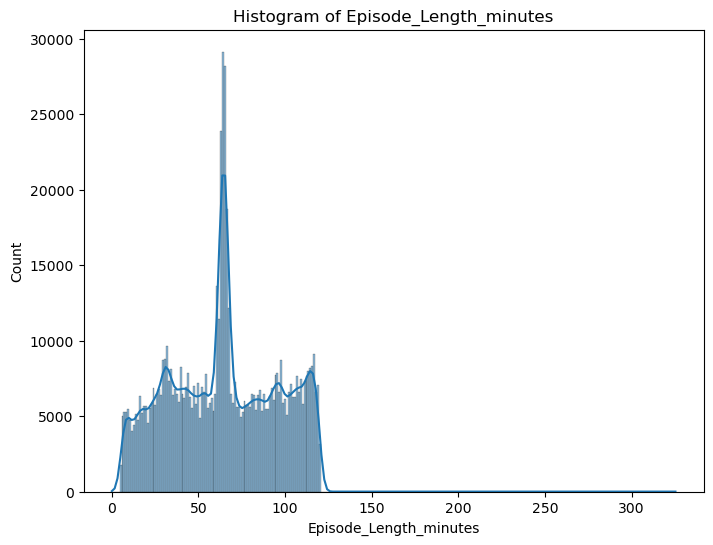

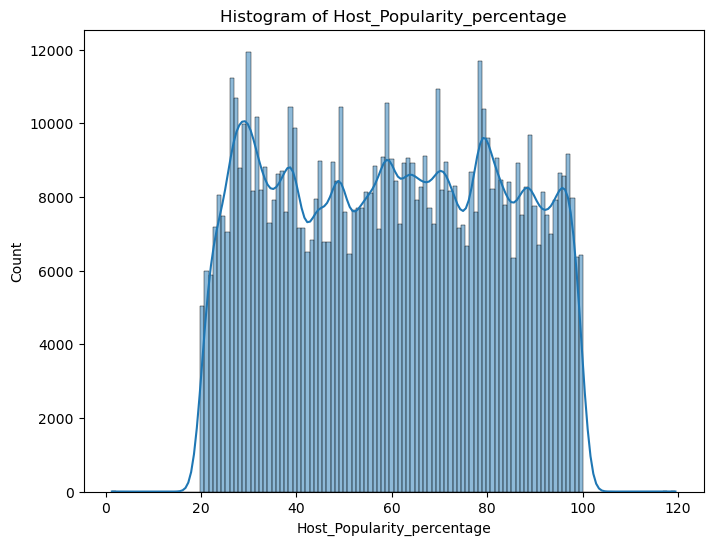

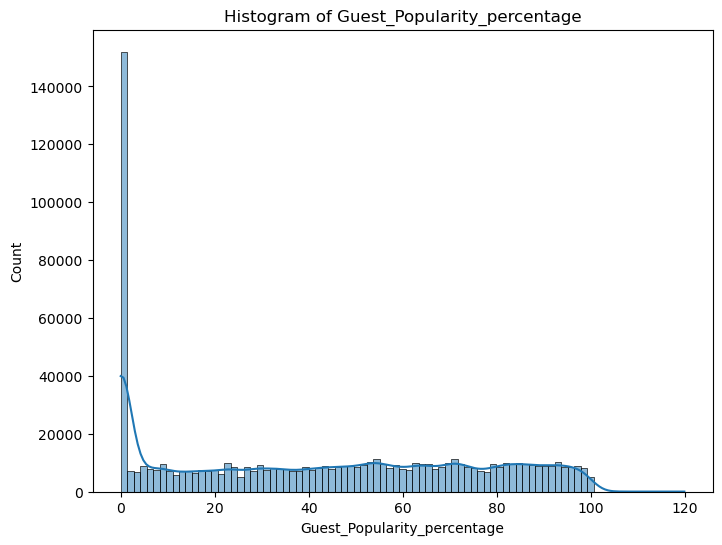

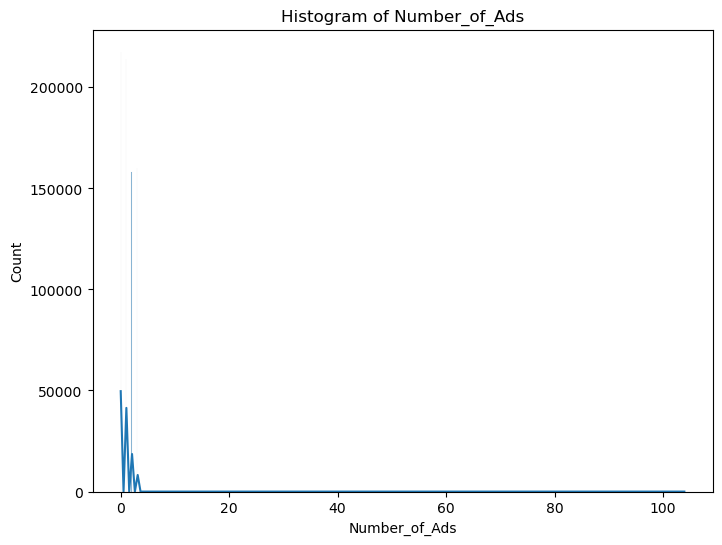

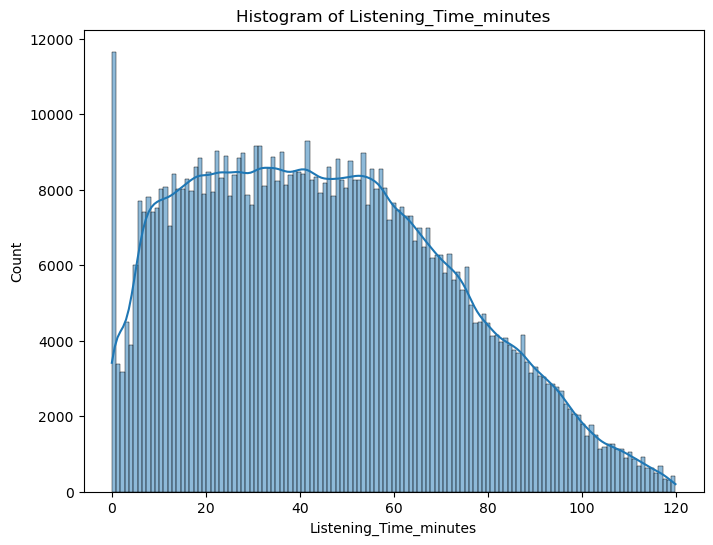

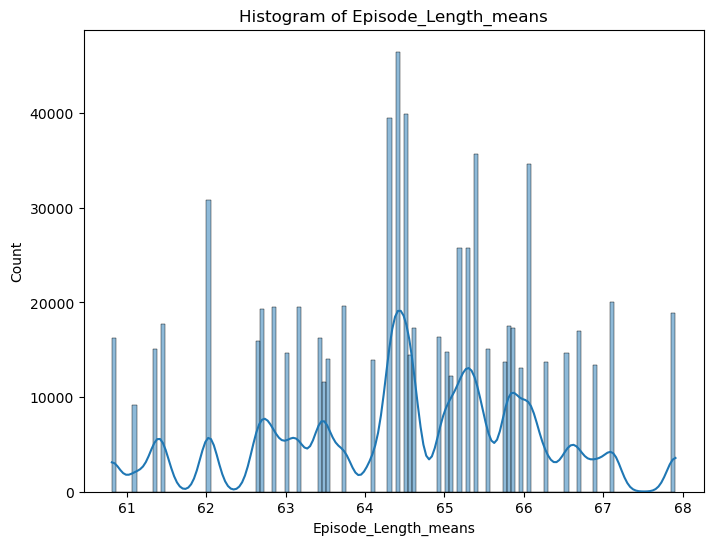

In [14]:
#catagorical
cats = data[['Podcast_Name','Episode_Title','Genre','Publication_Day','Publication_Time','Episode_Sentiment']]
dogs = data[['Episode_Length_minutes','Host_Popularity_percentage','Guest_Popularity_percentage', 'Number_of_Ads', 'Listening_Time_minutes','Episode_Length_means']]
for feature in dogs:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=dogs, x=feature, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt.show()

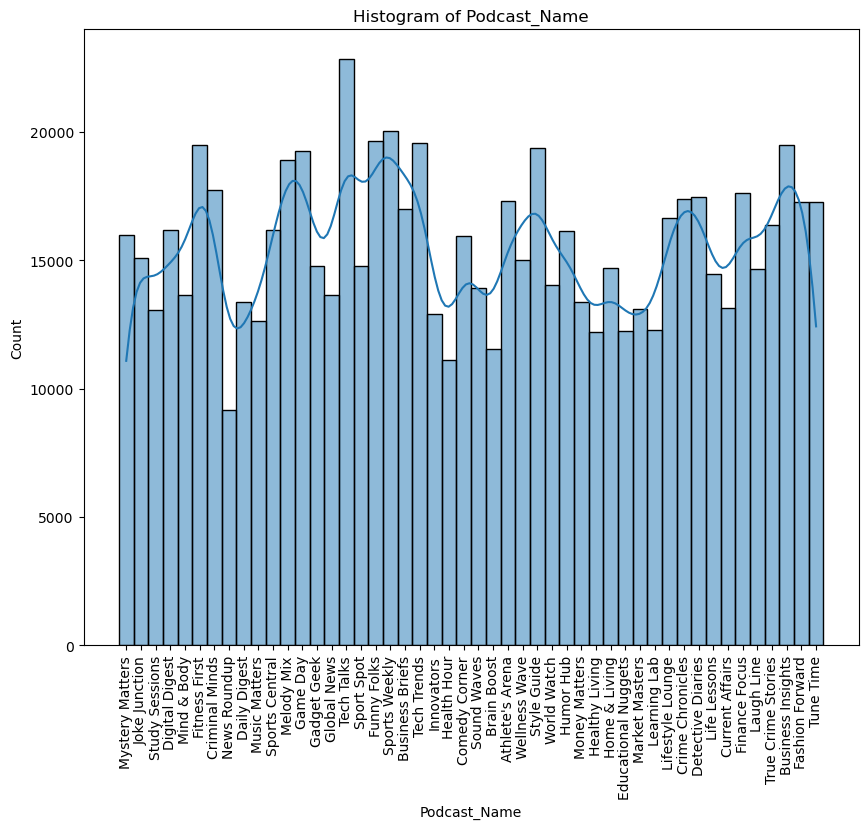

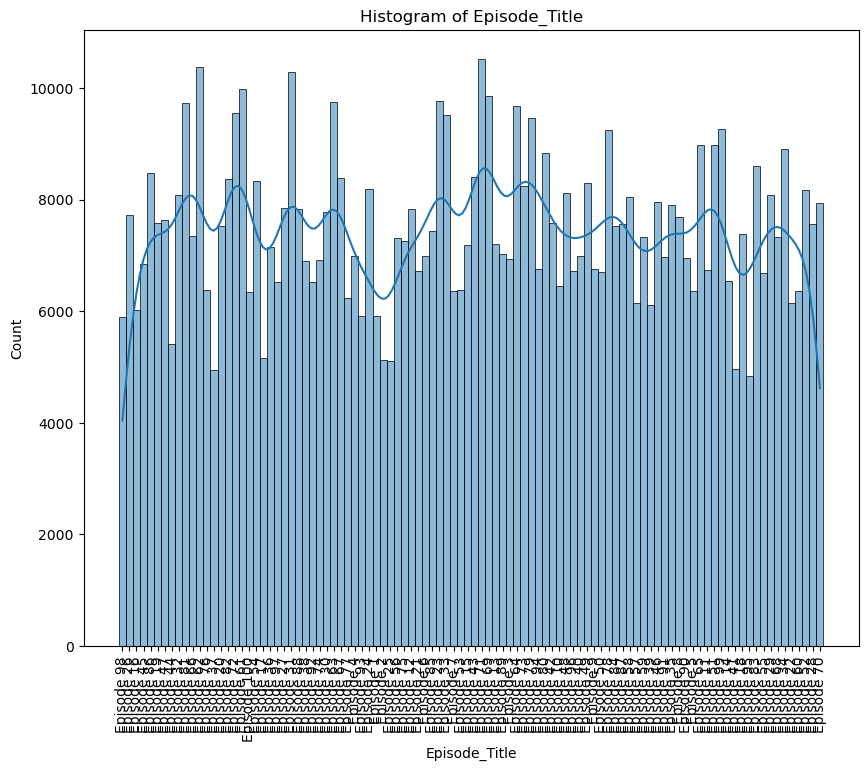

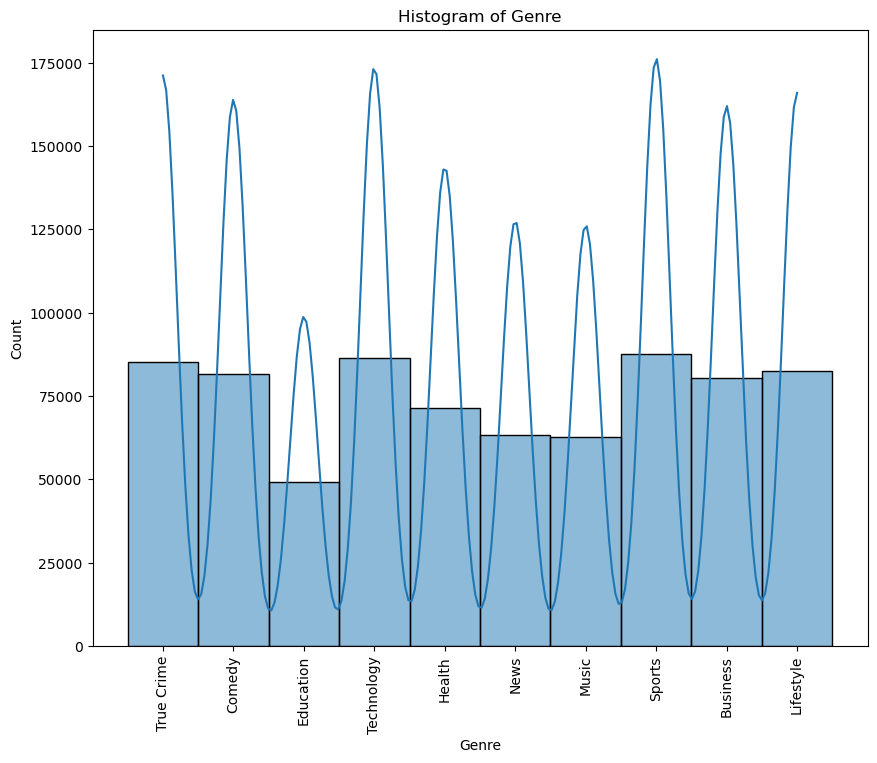

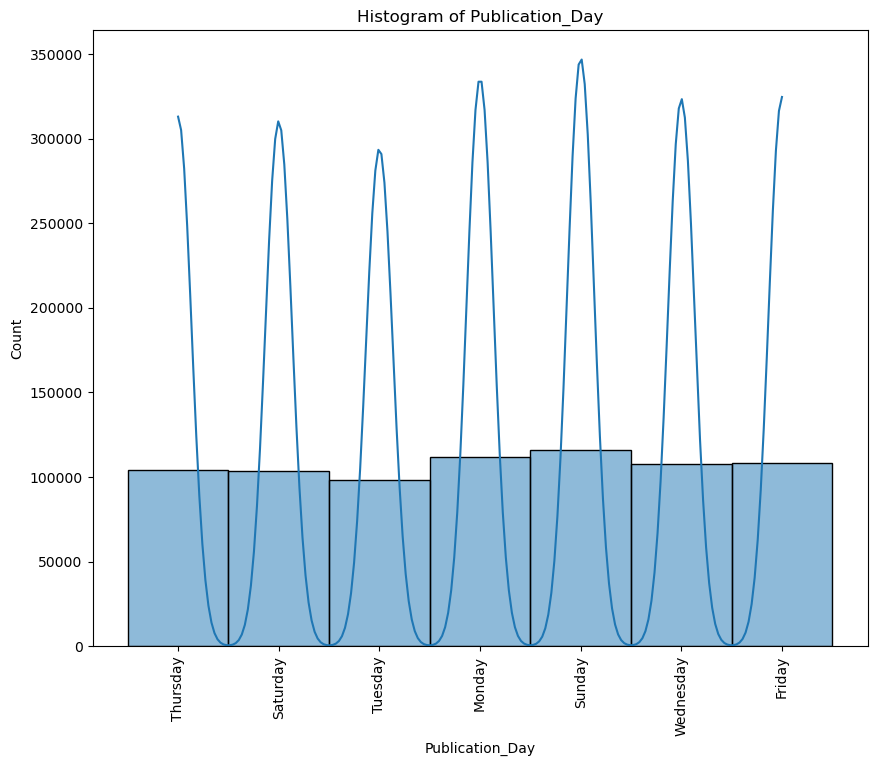

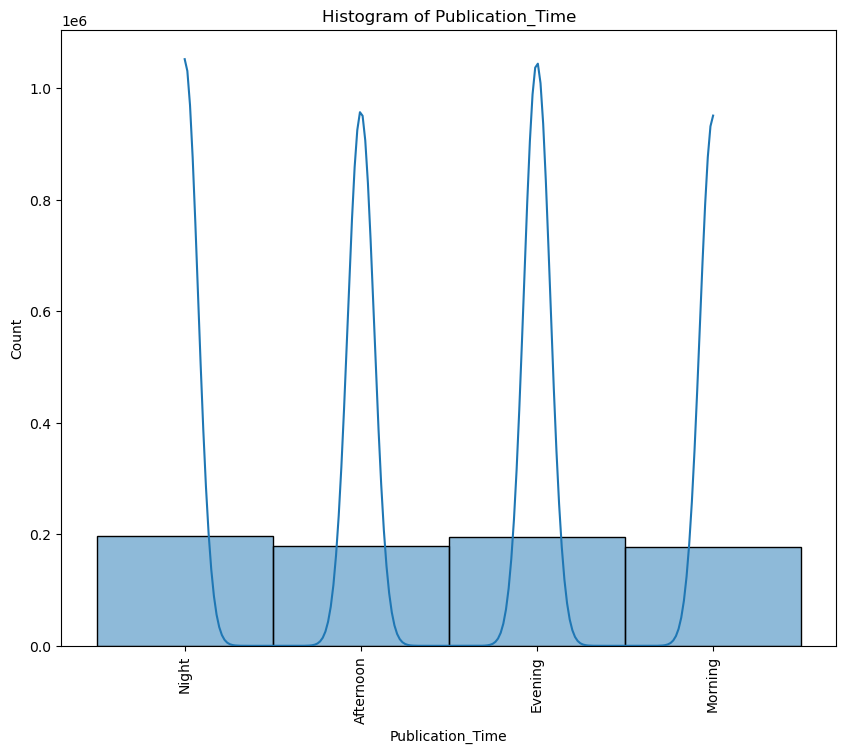

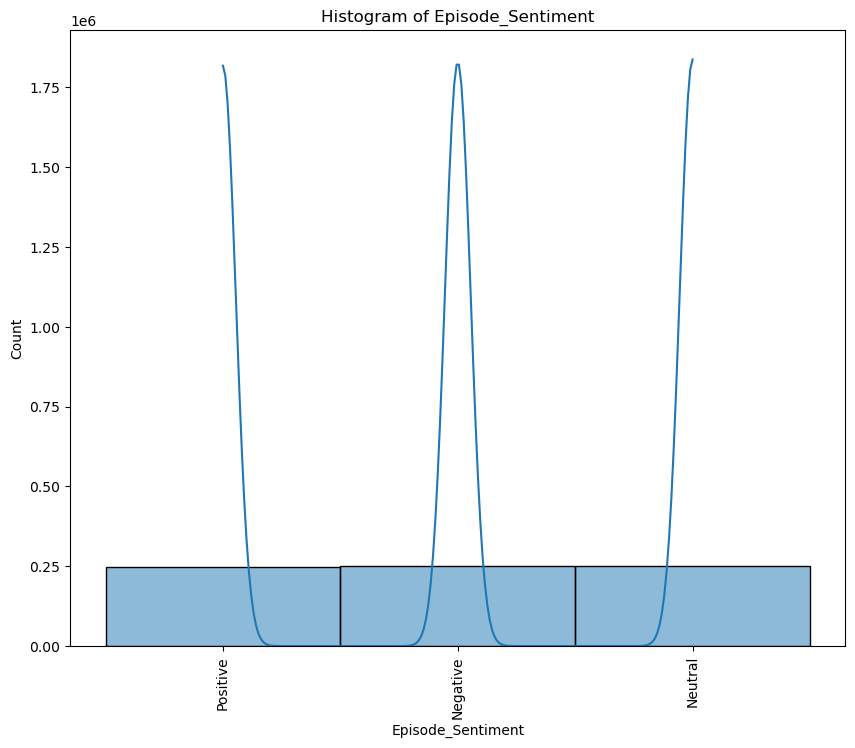

In [15]:
for feature in cats:
    plt.figure(figsize=(10, 8))
    sns.histplot(data=cats, x=feature, kde=True)
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature}')
    plt.show()

# Bivariate Analysis

<Axes: >

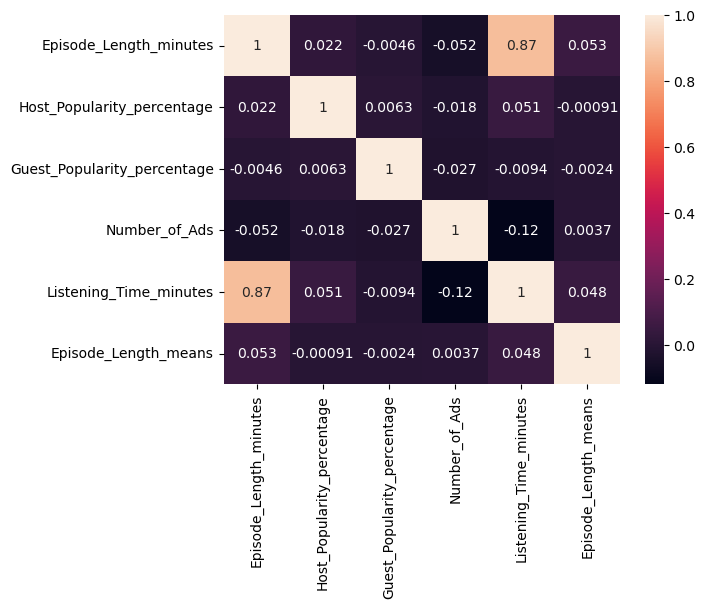

In [16]:
sns.heatmap(dogs.corr(), annot=True)

Episode_Length_minutes shows a high positive correlation with Listening_Time_minutes. Across all data, the longer a podcast was, the longer a user listened. This column must be included in our model.

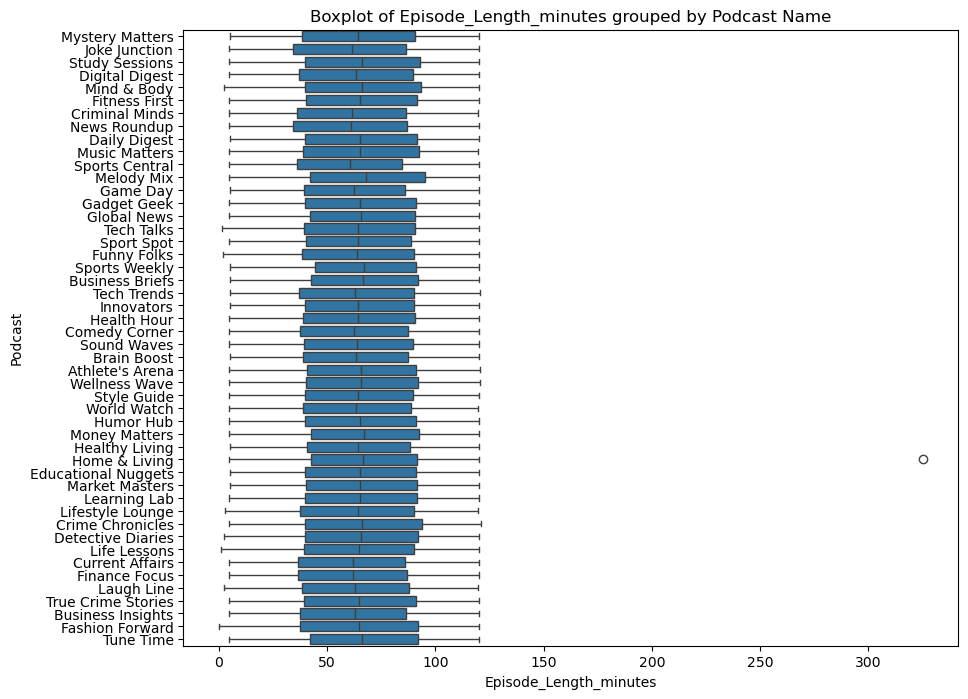

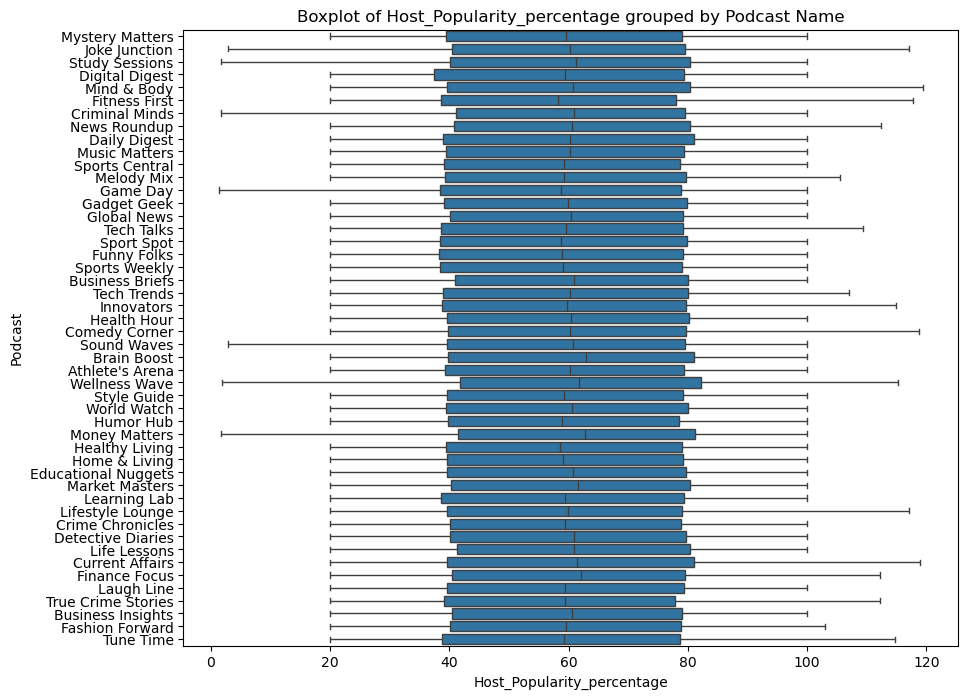

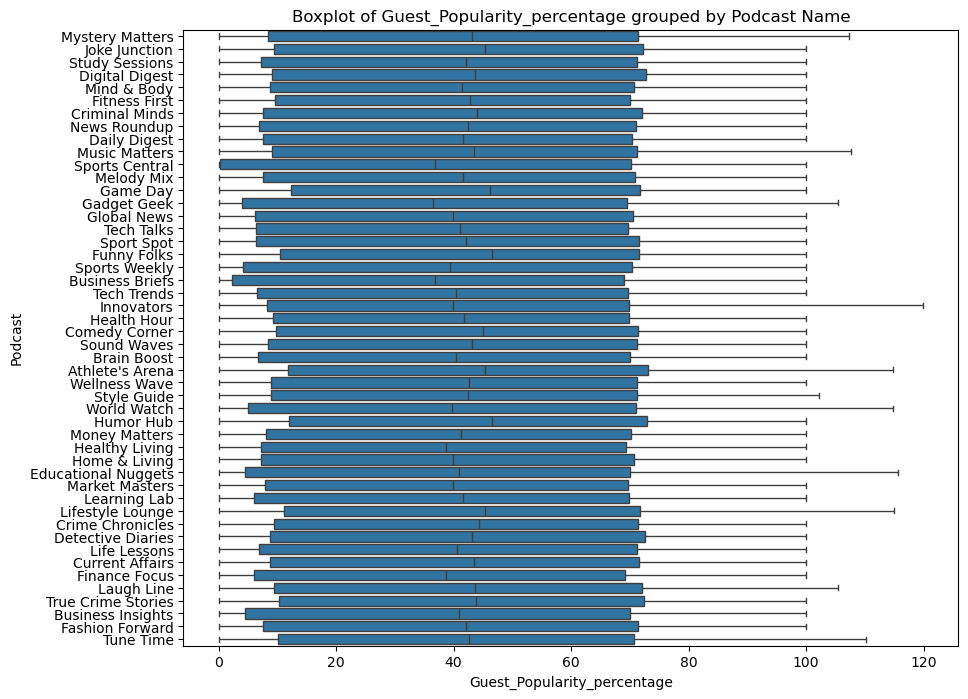

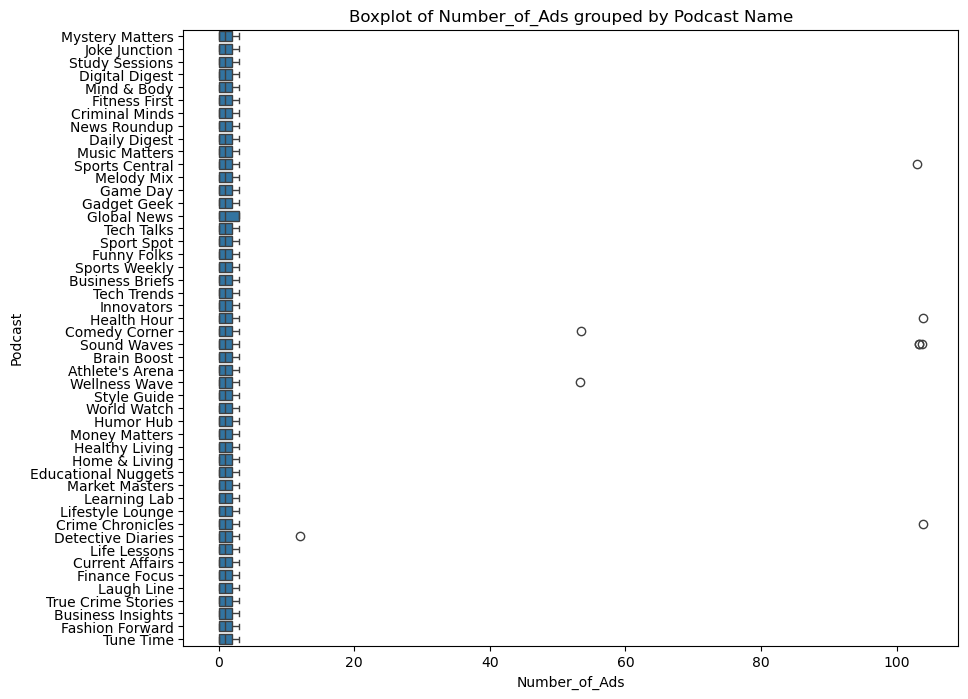

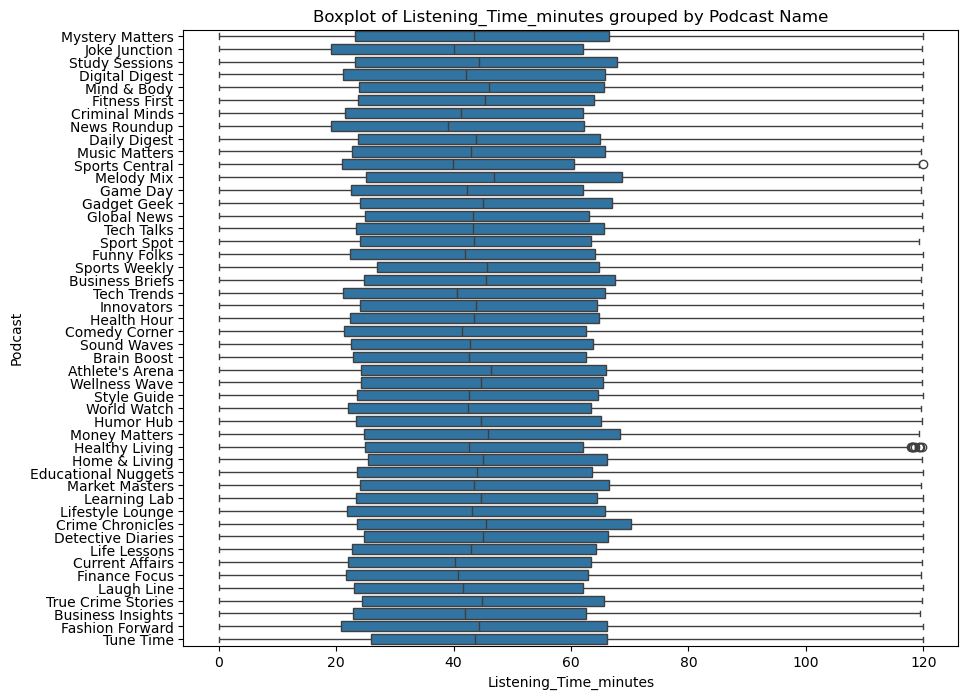

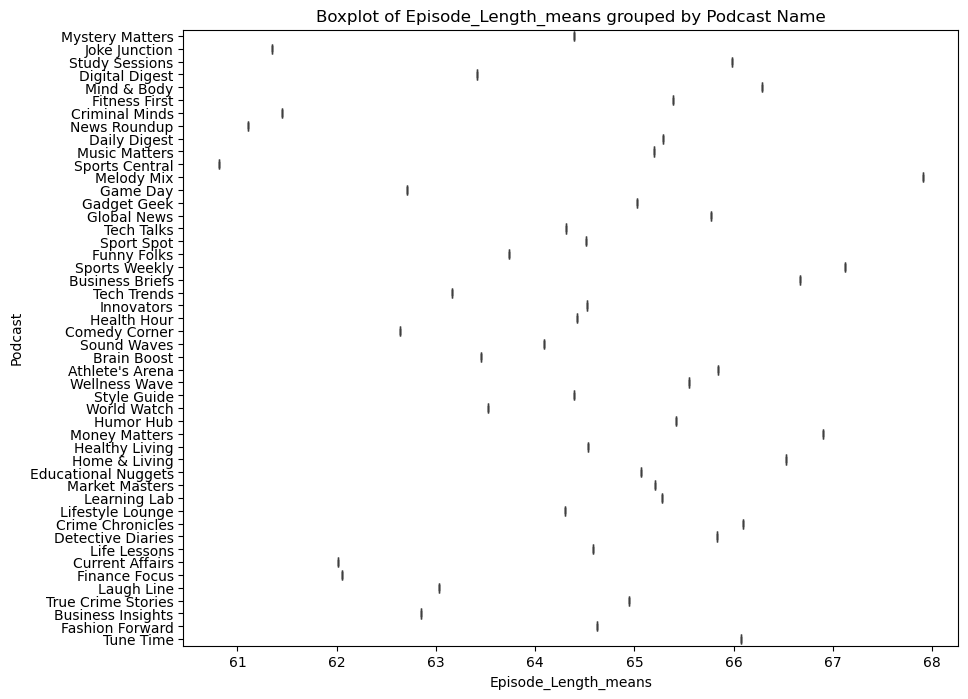

In [17]:
for feature in dogs:
    data.groupby('Podcast_Name')[feature].mean()
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=data, y='Podcast_Name',x=feature)
    plt.xlabel(feature)
    
    plt.ylabel('Podcast')
    plt.title(f'Boxplot of {feature} grouped by Podcast Name')
    plt.show()


There does not seem to be much difference between the positive and negative datasets.

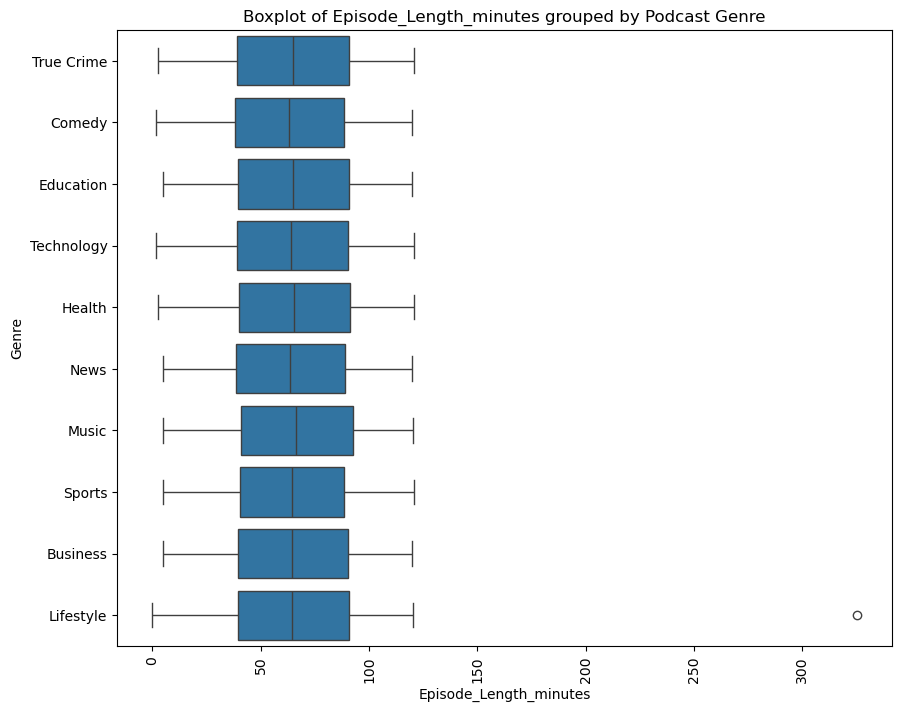

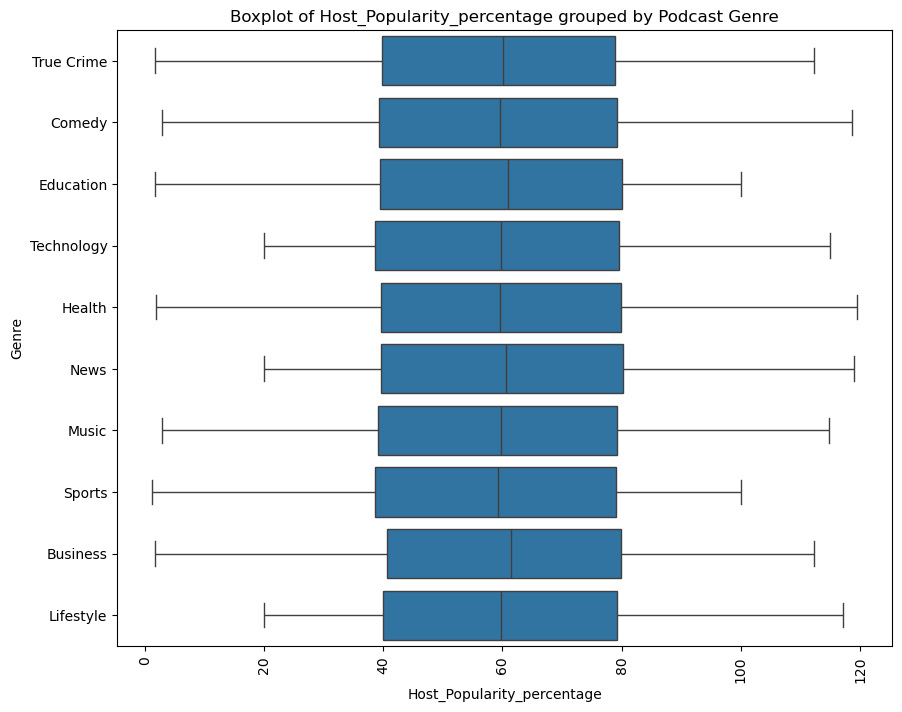

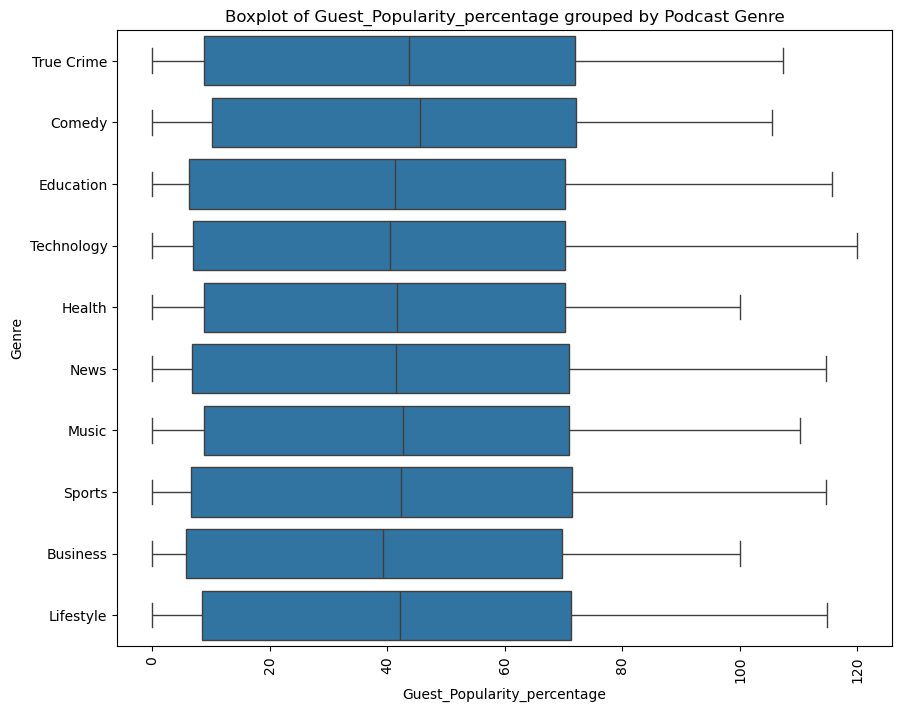

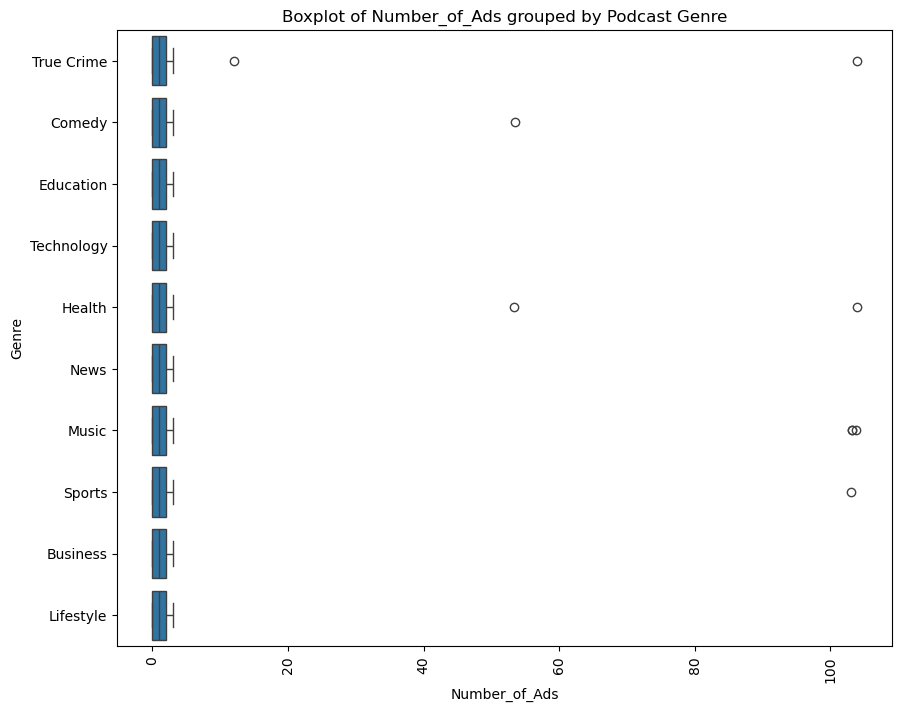

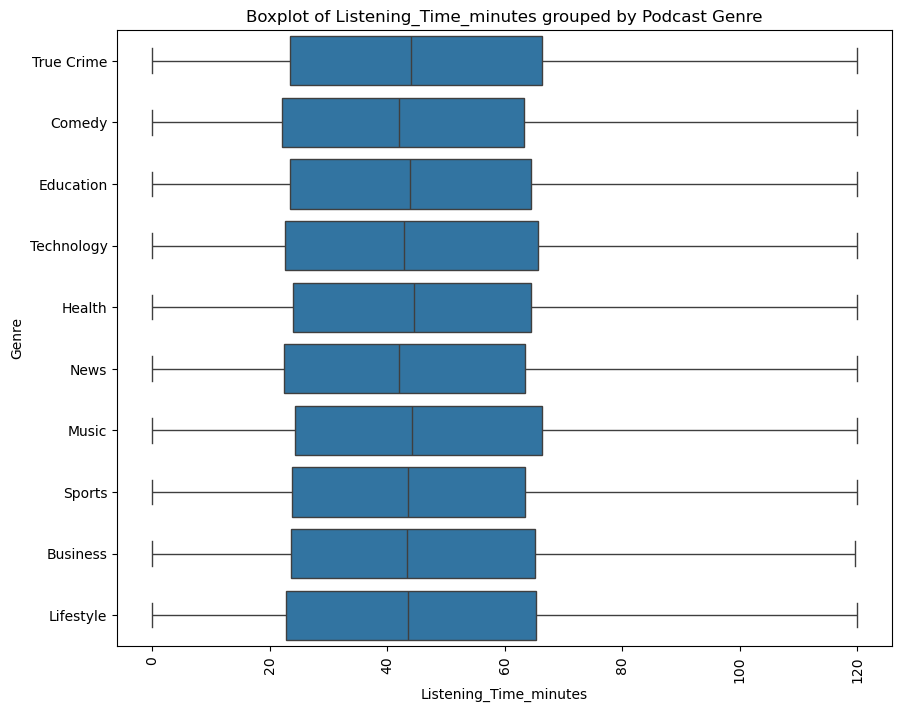

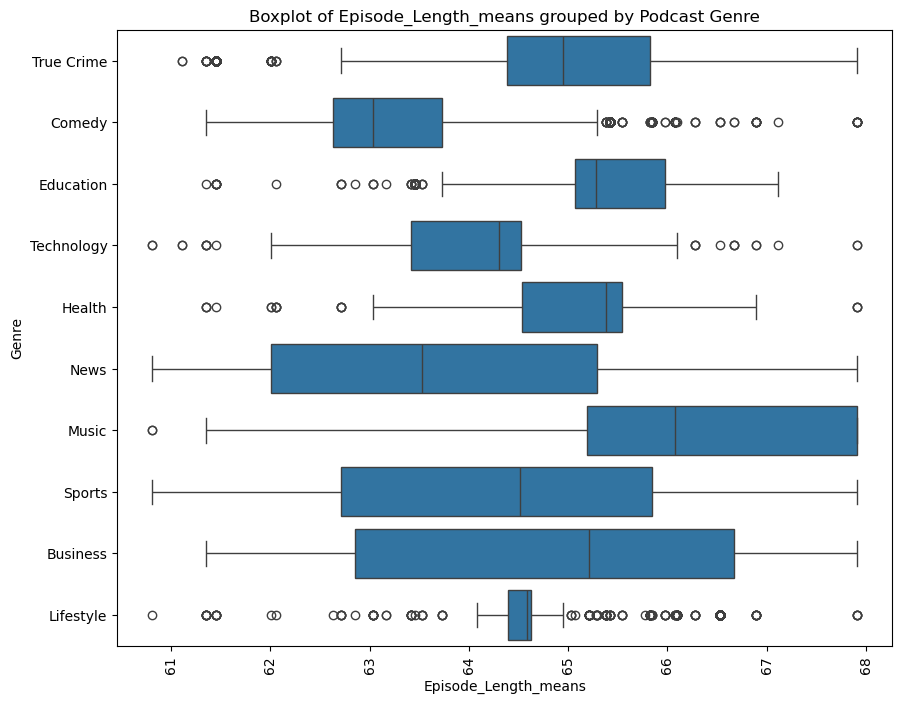

In [18]:
for feature in dogs:
    data.groupby('Genre')[feature].mean()
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=data, x=feature, y='Genre')
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('Genre')
    plt.title(f'Boxplot of {feature} grouped by Podcast Genre')
    plt.show()

<Axes: ylabel='Genre'>

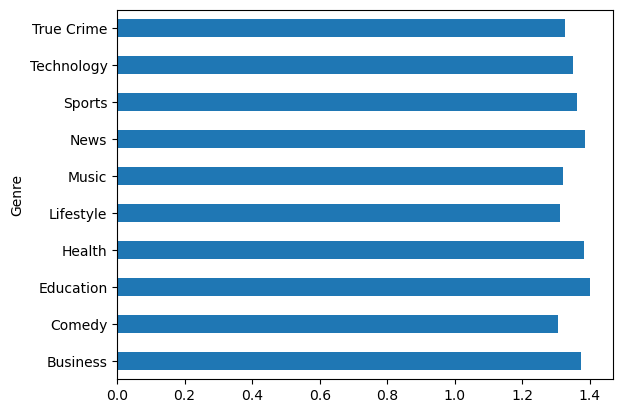

In [19]:
data.groupby('Genre')['Number_of_Ads'].mean().plot(kind='barh')

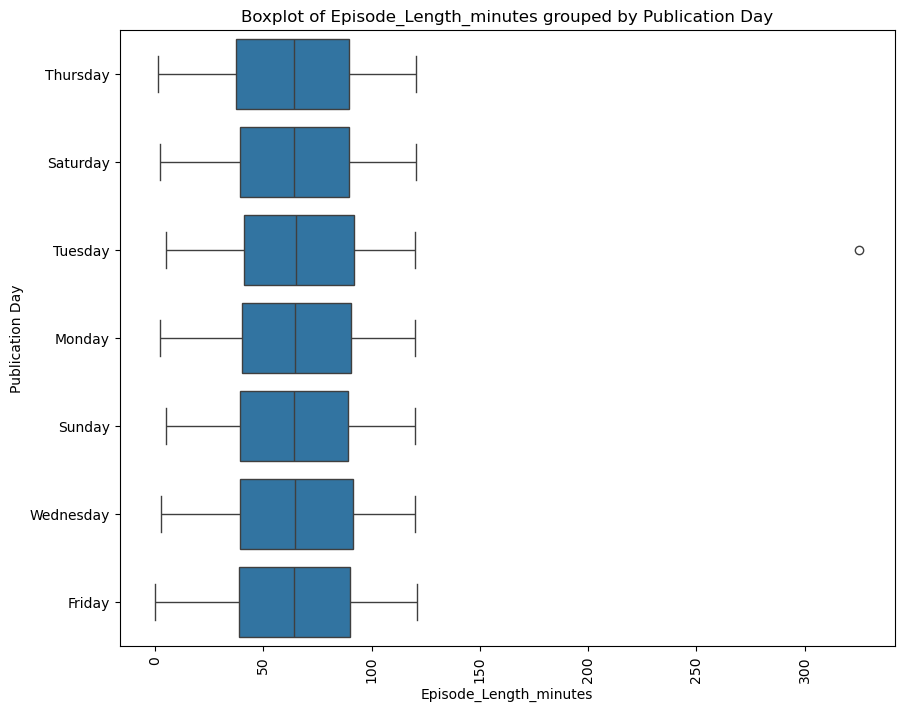

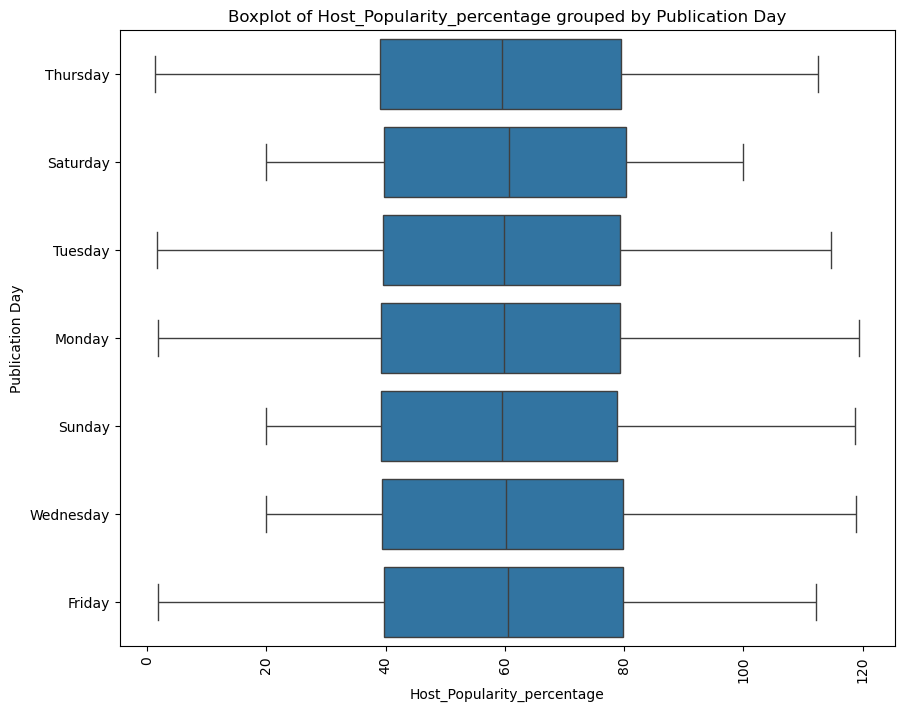

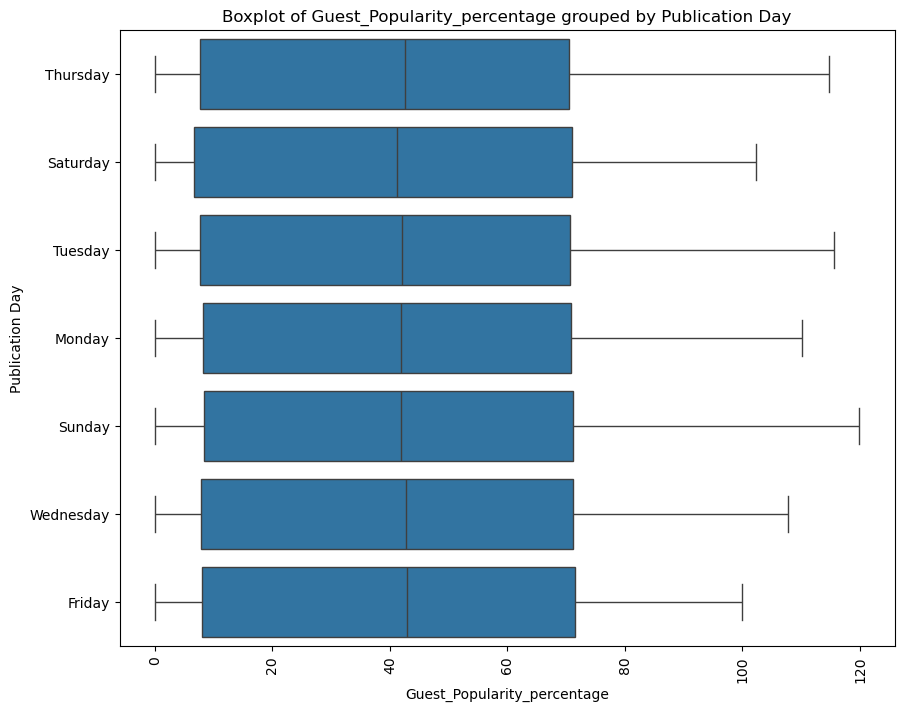

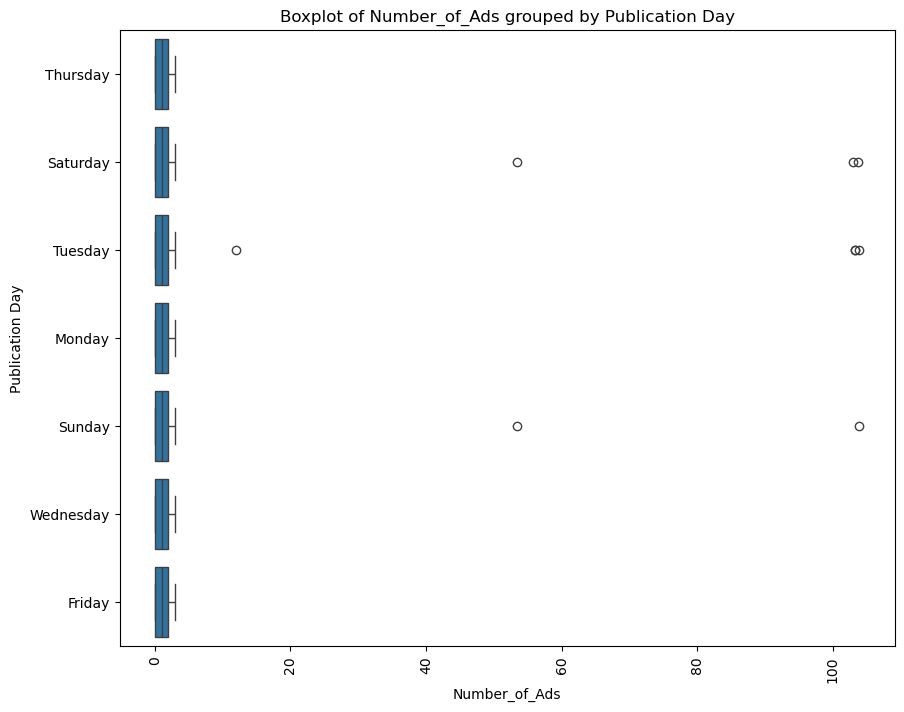

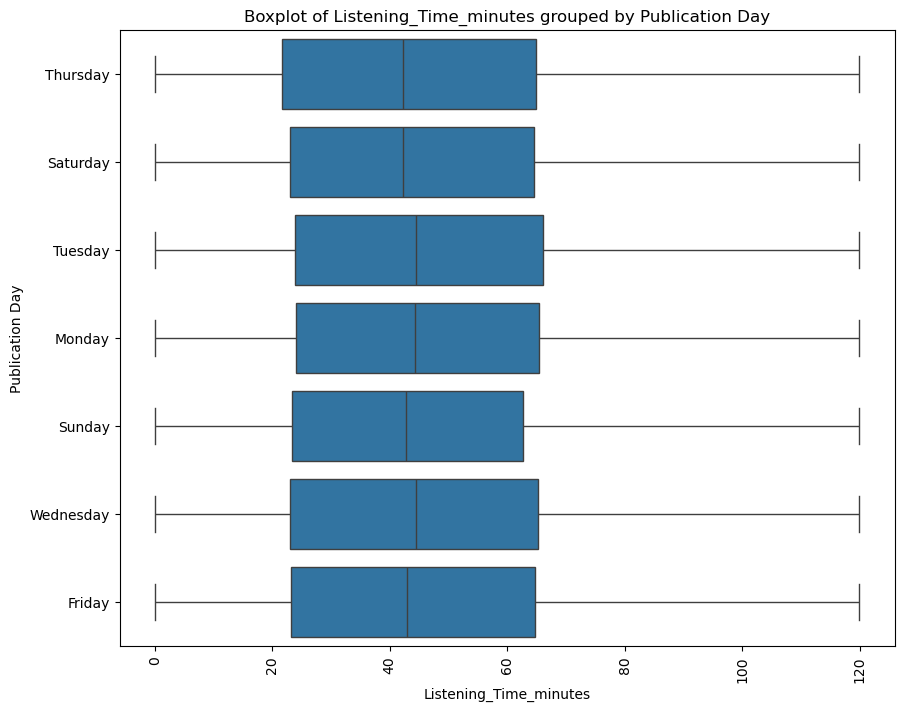

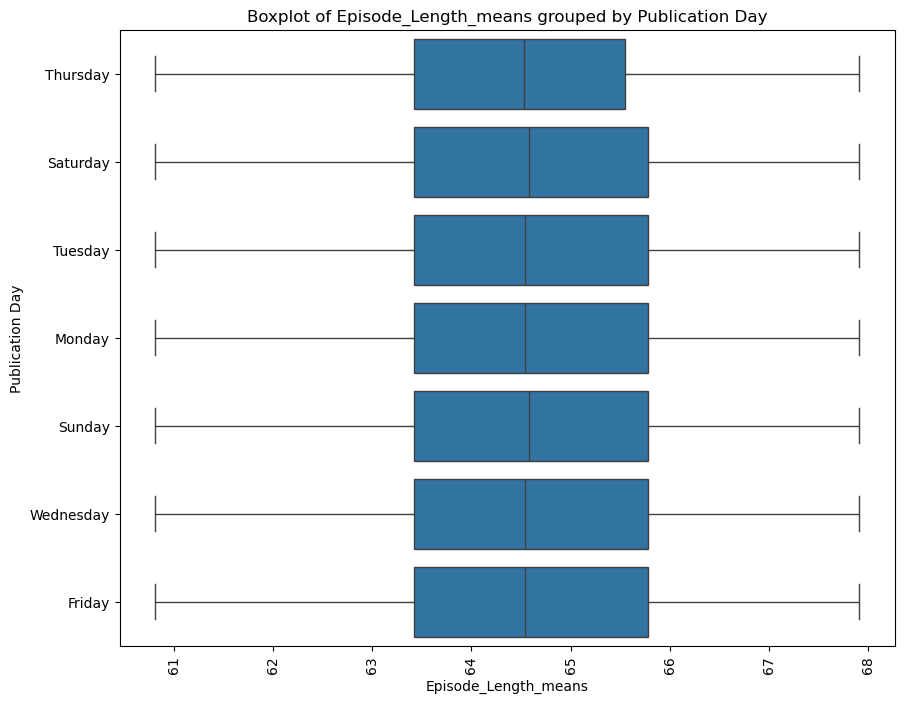

In [20]:
for feature in dogs:
    data.groupby('Publication_Day')[feature].mean()
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=data,y='Publication_Day',x=feature)
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('Publication Day')
    plt.title(f'Boxplot of {feature} grouped by Publication Day')
    plt.show()

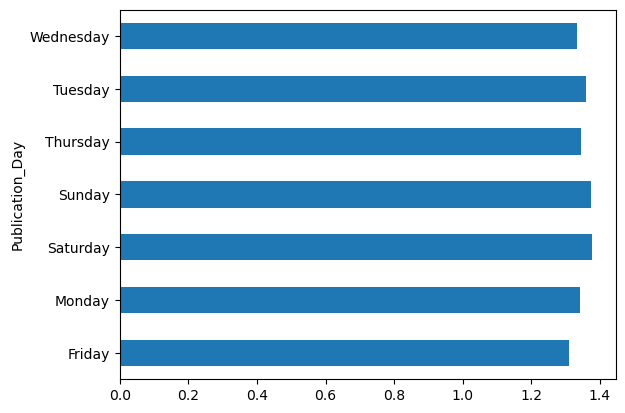

In [21]:
data.groupby('Publication_Day')['Number_of_Ads'].mean().plot(kind='barh') 
plt.show()

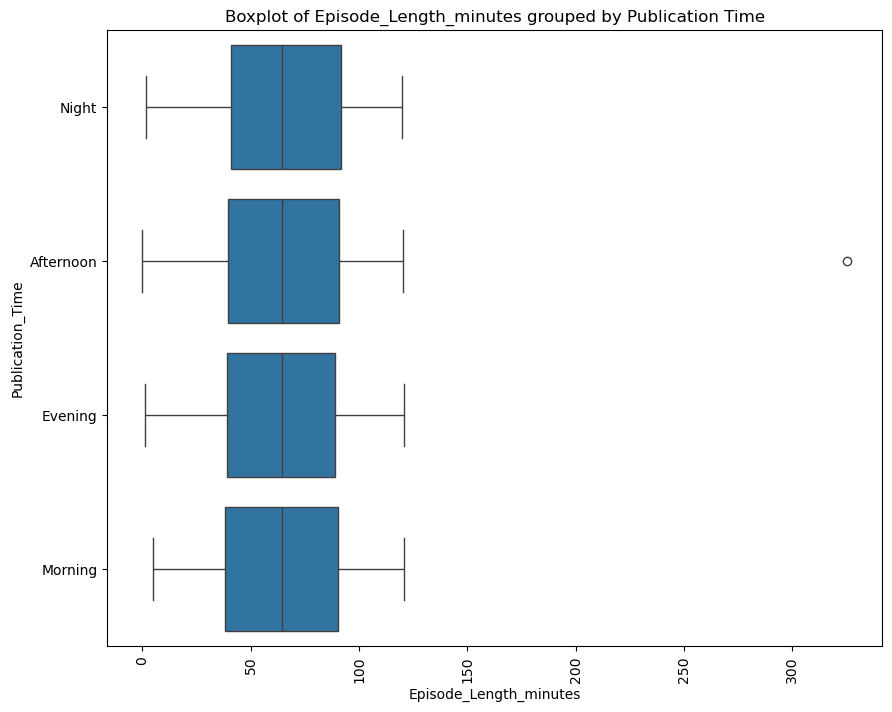

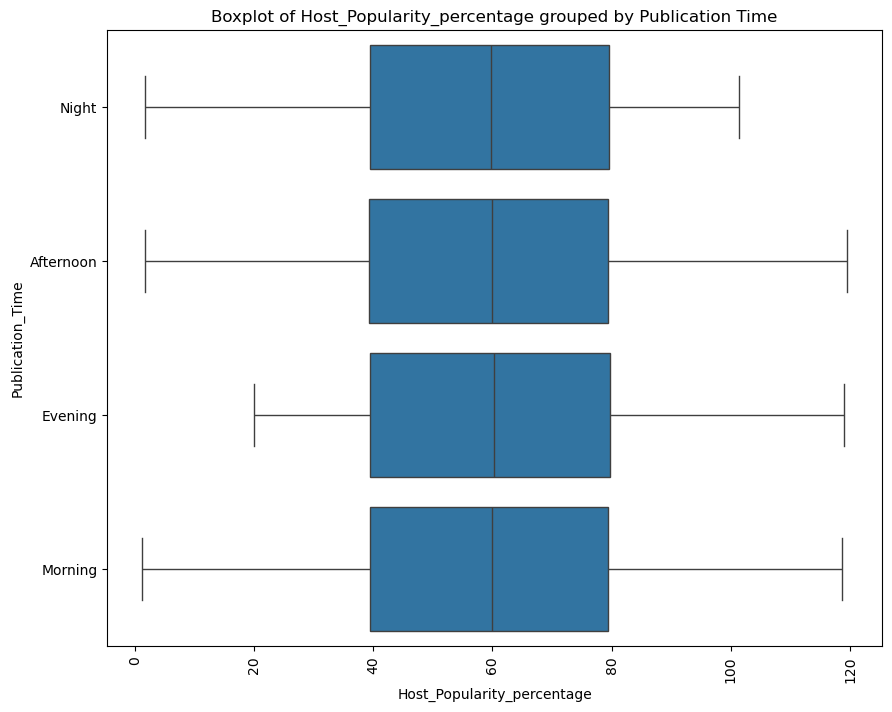

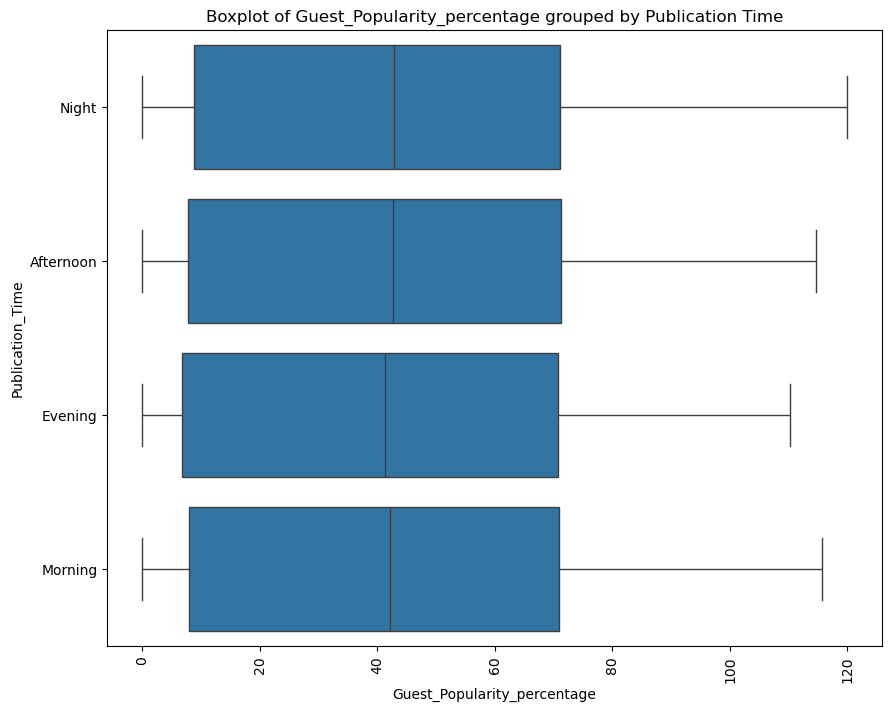

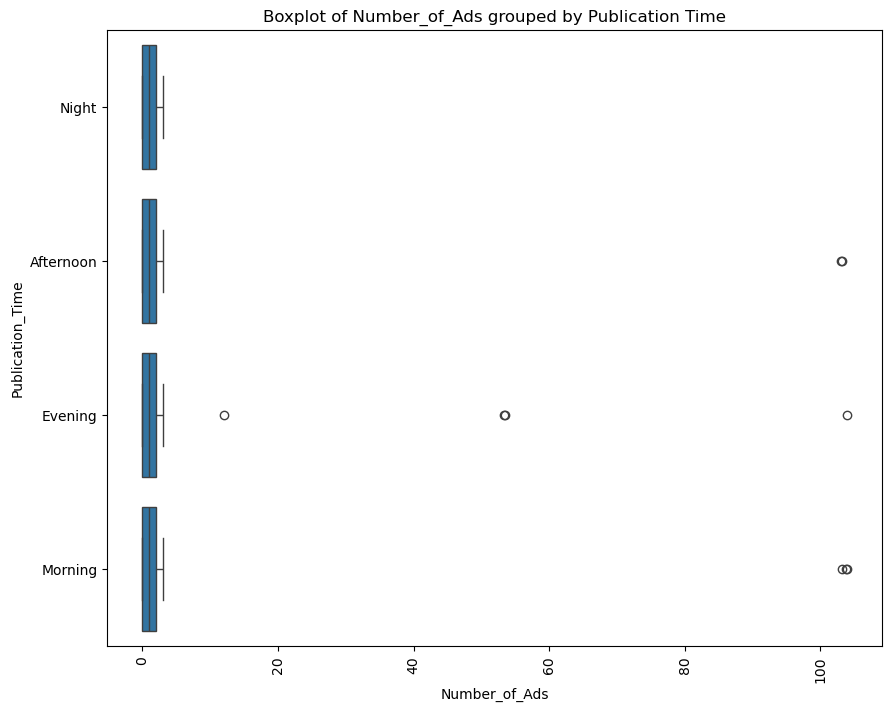

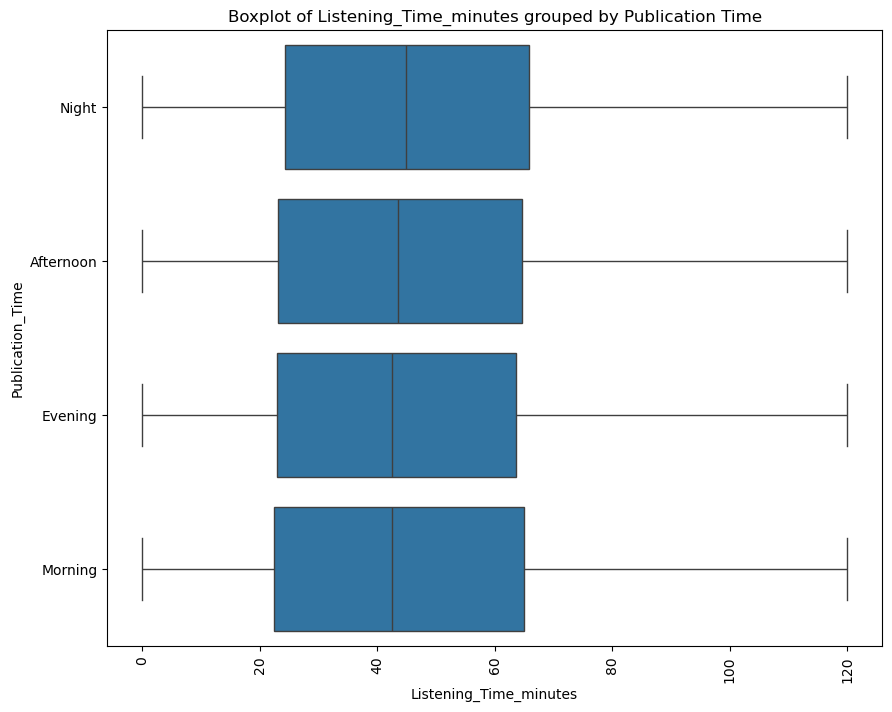

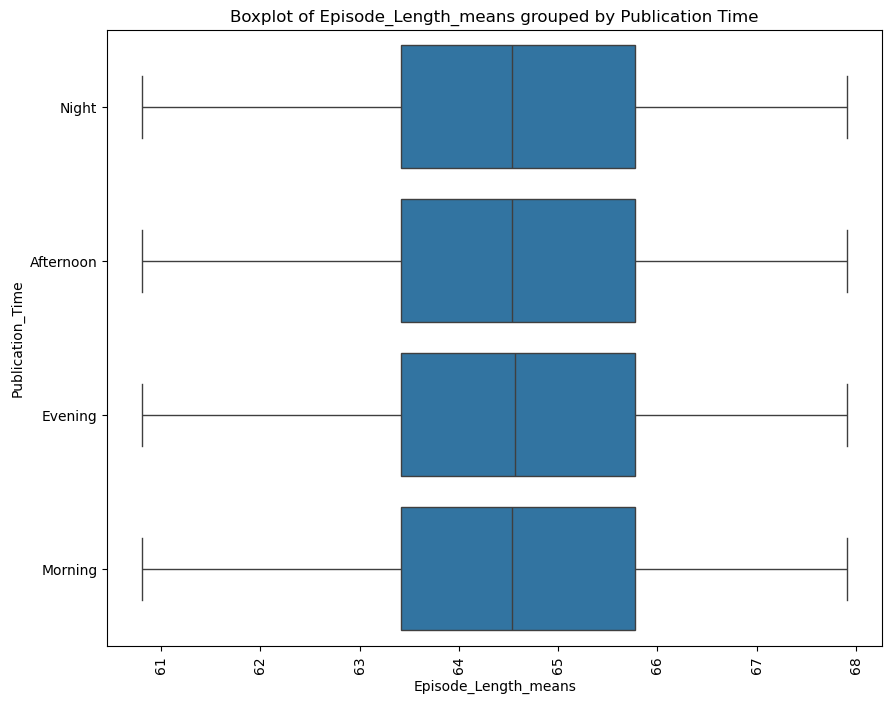

In [22]:
for feature in dogs:
    data.groupby('Publication_Time')[feature].mean()
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=data,y='Publication_Time',x=feature)
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('Publication_Time')
    plt.title(f'Boxplot of {feature} grouped by Publication Time')
    plt.show()

<Axes: xlabel='Publication_Time'>

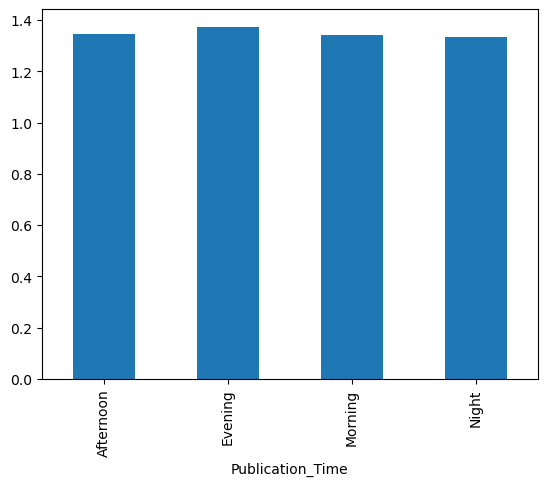

In [23]:
data.groupby('Publication_Time')['Number_of_Ads'].mean().plot(kind='bar')

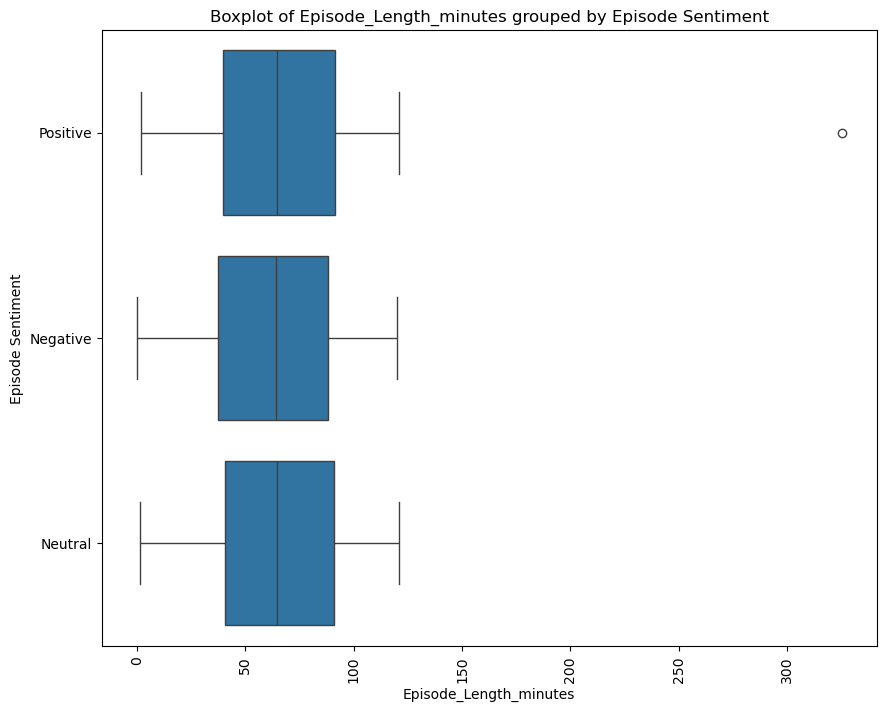

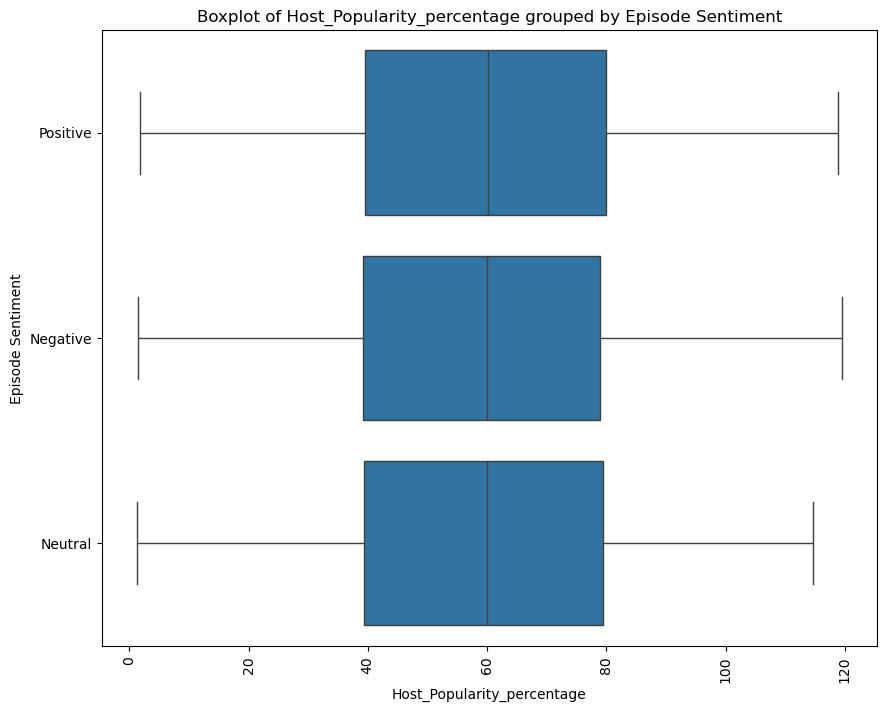

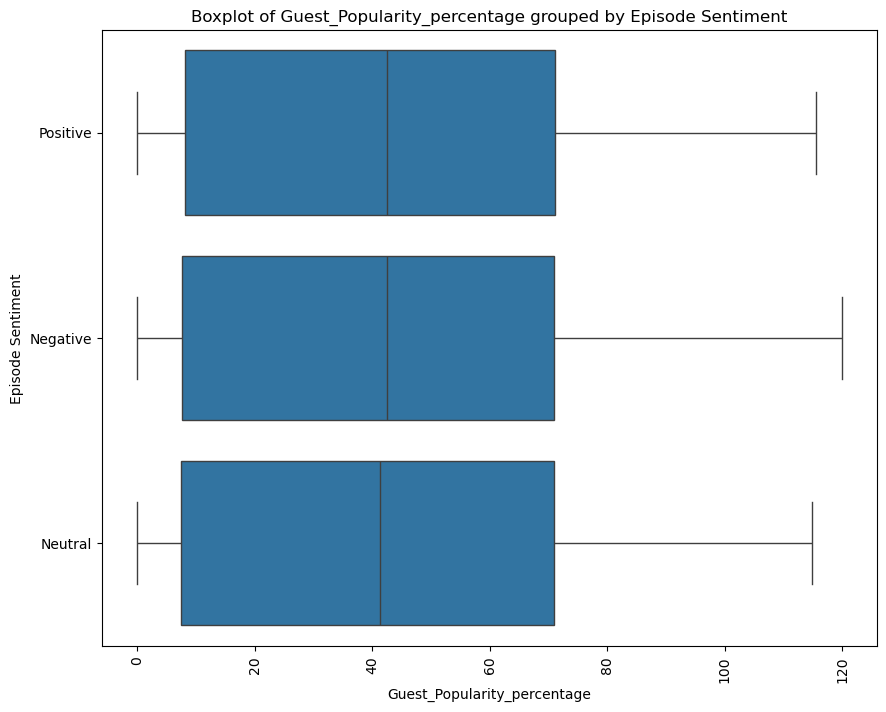

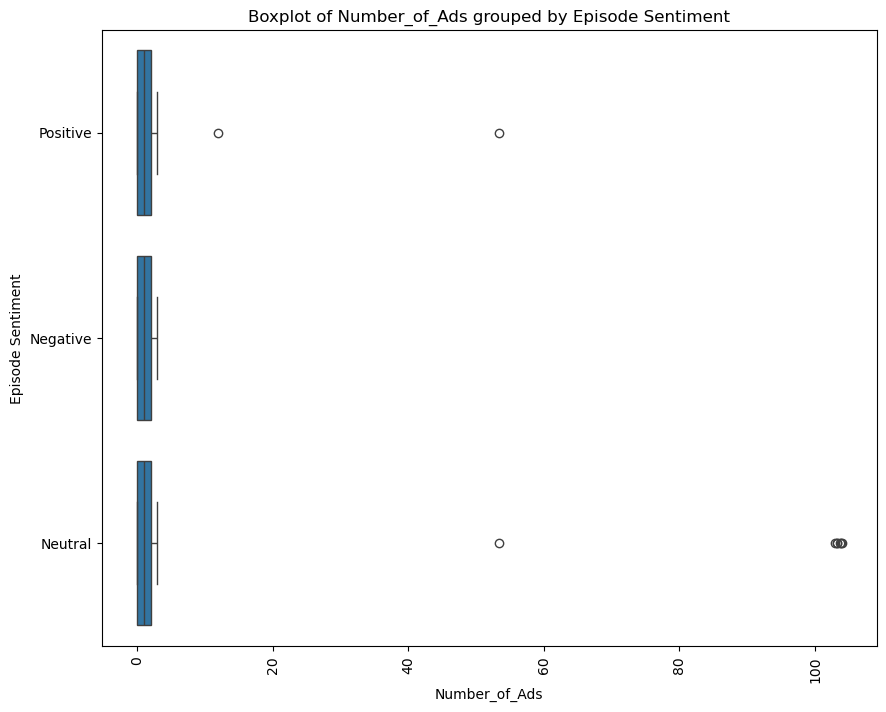

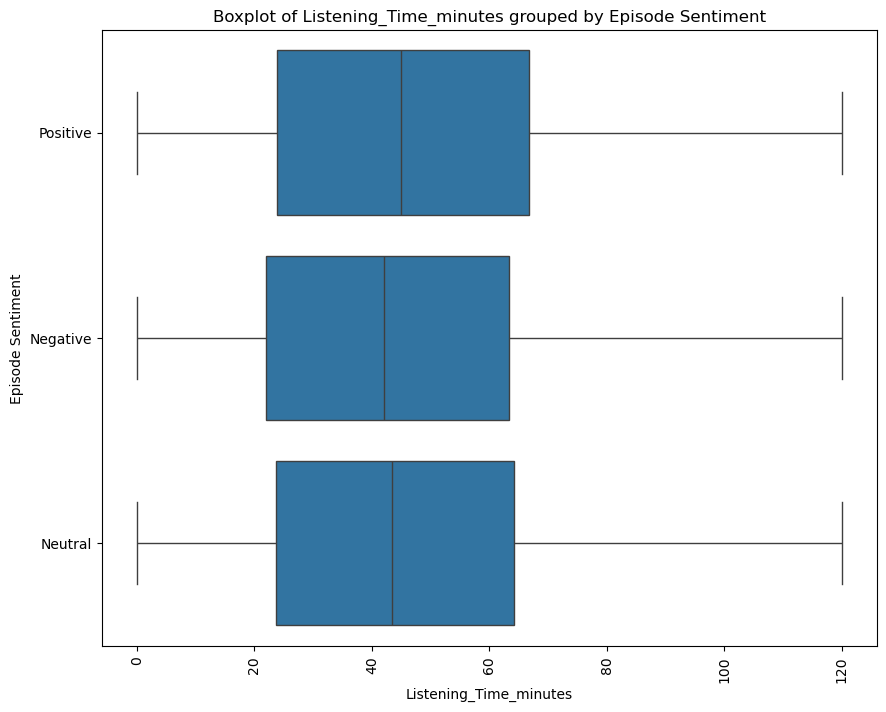

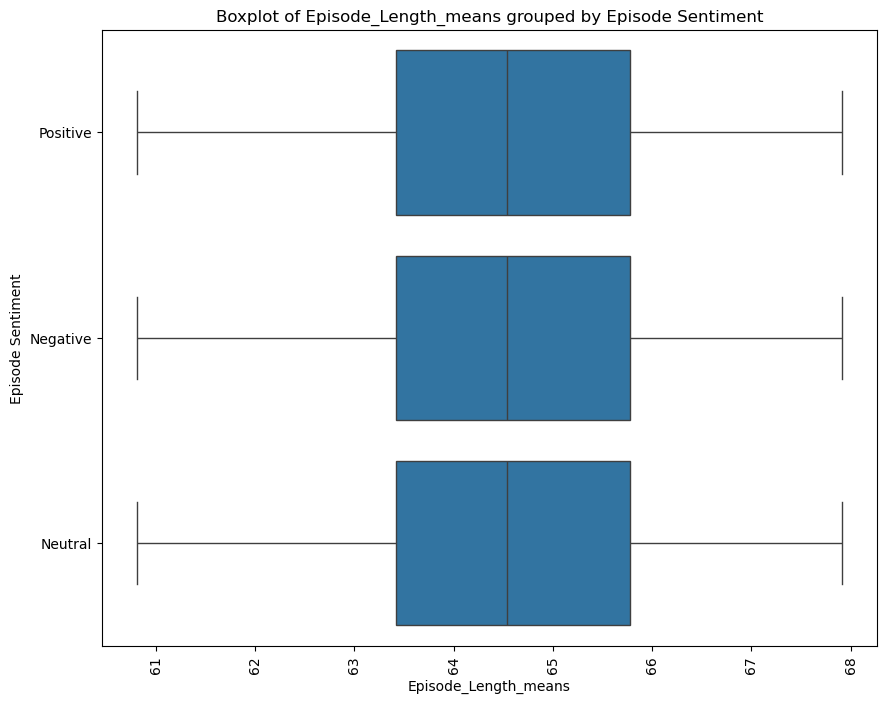

In [24]:
for feature in dogs:
    data.groupby('Episode_Sentiment')[feature].mean()
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=data,y='Episode_Sentiment',x=feature)
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.ylabel('Episode Sentiment')
    plt.title(f'Boxplot of {feature} grouped by Episode Sentiment')
    plt.show()

These boxplots are almost all identical. This means that there is nothing within these columns that would be predictive of Episode Sentiment. The only column that saw varience was the Listening_Time column. This makes sense in context, the more a viewer enjoyed an episode the more likely they continued to listen longer.

Number of ads was unreadable, so i am going to produce a clearer visualization below.

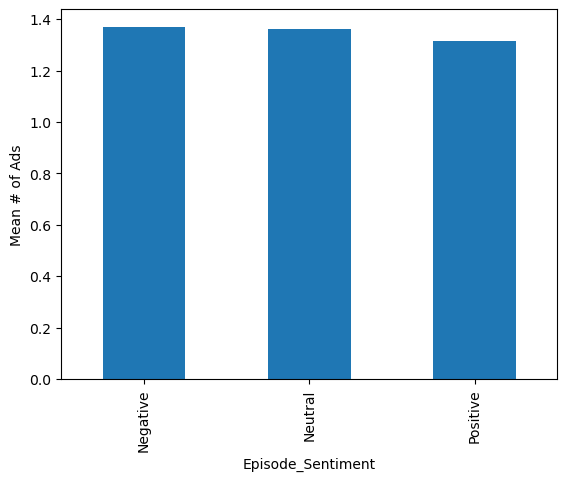

In [25]:
data.groupby('Episode_Sentiment')['Number_of_Ads'].mean().plot(kind='bar')
plt.ylabel('Mean # of Ads')
plt.show()

The difference may be small, but there is something here. Podcast episodes that had positive sentiment had a less ads.

Moving onto the next part of my bivariate analysis, I would like to focus on this specific column - Episode_Sentiment and how it relates to other columns. We observed that Positive sentiment led to a slightly higher listening time. By isolating values with Positive sentiment, we can see if there is any trends within this subset of data to influence positive sentiment

In [26]:
positive = data[data['Episode_Sentiment'] == 'Positive']
negative = data[data['Episode_Sentiment'] == 'Negative']
positive.describe()

id  Episode_Length_minutes  Host_Popularity_percentage  \
count  248593.000000           248593.000000               248593.000000   
mean   374871.798023               65.145836                   60.070591   
std    216367.370931               31.006914                   22.966515   
min         0.000000                1.840000                    1.730000   
25%    187494.000000               39.850000                   39.560000   
50%    374666.000000               64.584587                   60.150000   
75%    562127.000000               91.480000                   79.890000   
max    749992.000000              325.240000                  118.930000   

       Guest_Popularity_percentage  Number_of_Ads  Listening_Time_minutes  \
count                248593.000000  248593.000000           248593.000000   
mean                     42.244492       1.313727               46.723815   
std                      32.816664       1.103747               27.731117   
min                       0.000000       0.000000                0.000000   
25%                       8.160000       0.000000               23.872320   
50%                      42.540000       1.000000               44.928420   
75%                      71.120000       2.000000               66.813870   
max                     115.620000      53.370000              119.970000   

       Episode_Length_means  
count         248593.000000  
mean              64.503884  
std                1.642817  
min               60.810536  
25%               63.417366  
50%               64.535387  
75%               65.775773  
max               67.909736

In [27]:
negative.describe()

id  Episode_Length_minutes  Host_Popularity_percentage  \
count  250116.000000           250116.000000                250116.00000   
mean   375449.280022               63.267739                    59.67353   
std    216525.783527               31.205003                    22.79277   
min         1.000000                0.000000                     1.47000   
25%    187933.750000               37.567500                    39.27000   
50%    375715.000000               64.085964                    60.03000   
75%    563272.500000               88.390000                    79.03000   
max    749998.000000              119.990000                   119.46000   

       Guest_Popularity_percentage  Number_of_Ads  Listening_Time_minutes  \
count                250116.000000  250116.000000           250116.000000   
mean                     42.197836       1.369708               44.096838   
std                      32.827914       1.115226               26.920785   
min                       0.000000       0.000000                0.000000   
25%                       7.720000       0.000000               22.046835   
50%                      42.590000       1.000000               42.000410   
75%                      71.050000       2.000000               63.292250   
max                     119.910000       3.000000              119.970000   

       Episode_Length_means  
count         250116.000000  
mean              64.485865  
std                1.651802  
min               60.810536  
25%               63.417366  
50%               64.535387  
75%               65.775773  
max               67.909736

There does not seem to be much difference between the positive and negative datasets. Listening_Time and Number_of_Ads are lower but we already observed that. We do see that negative episodes are slightly shorter, but that column has already been kept. Not really much to go on here.

Looking at the problem from another angle, I could bin our target variable, Listening_Time, and see how our non-catagorical data's mean is affected. The larger the grouping, the more time people spent listening to the podcast.

/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_73447/667229479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouping["listening_labels"] = data["listening_labels"]
/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_73447/667229479.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouping = grouping.groupby('listening_labels').mean()


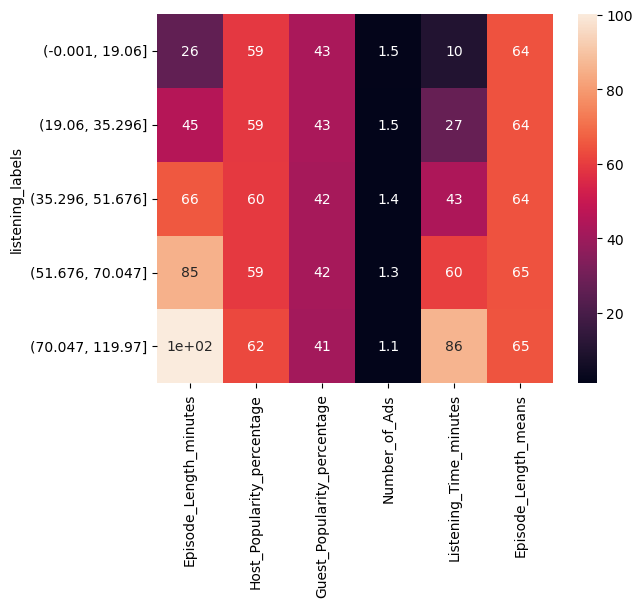

In [28]:
data["listening_labels"] = pd.qcut(data["Listening_Time_minutes"], 5)
cols = dogs.columns
grouping = data[cols]
grouping["listening_labels"] = data["listening_labels"]

grouping = grouping.groupby('listening_labels').mean()
sns.heatmap(grouping, annot=True)
plt.show()

First 2 rows are listening lengths up to around 35 mins. Next two rows are 35 - 70 mins. Last row is 70 to 1 hour.

A couple key takeaways: As seen before, episode_length and listening_time are correlated, however, the correlation is very even. Host_Popularity seems to be higher in the hour+ podcasts, and Guest_Popularity a tad lower. This is probably explained by the necessity of a good host to maintain an audience for that long and less likely for a popular guest being able to devote that much time. The rest of the columns did not see much change here.  It is extremely interesting to note that the number of ads decreased the longer the podcasts went on.

The effect that Episode_Length has on Listening_Time is clear and inseperable. What this means is all of our analysis of Listening_Time is going to be skewed by the length. I propose creating a ratio of Listening_Time_minutes divided by Episode_Length_minutes and using this ratio for all further analysis. This will normalize our results for length and give us a better picture of how each variable is truely effecting our target variable.

(0.5, 0.7329676214634393)

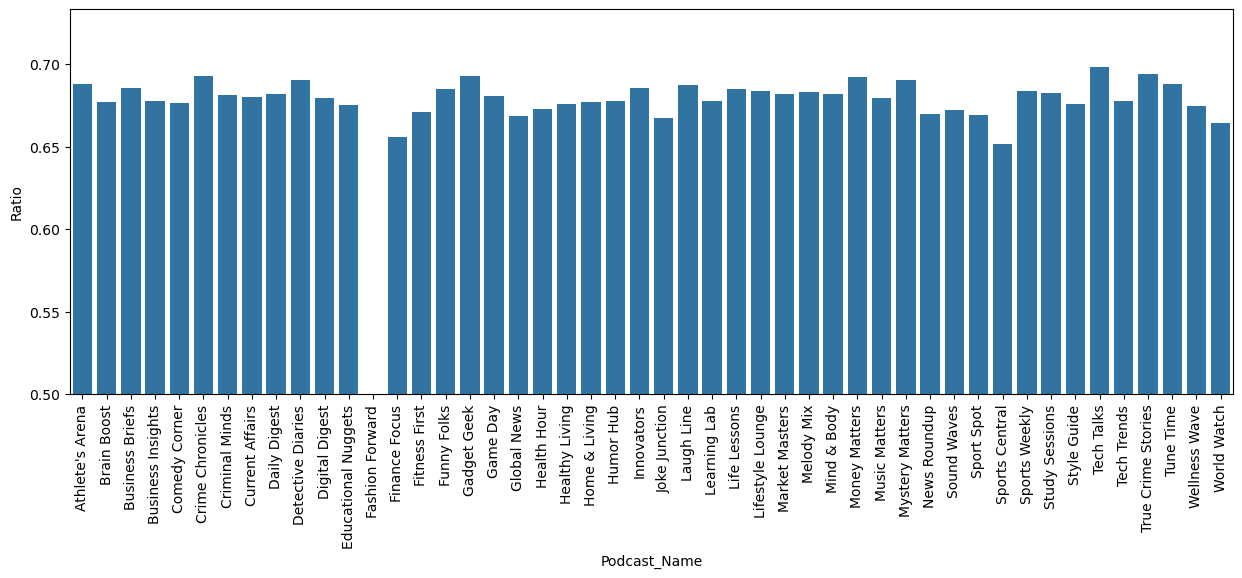

In [29]:
data['Ratio'] = data['Listening_Time_minutes'] / data['Episode_Length_minutes']
grouping_ratio = data.groupby('Podcast_Name')['Ratio'].mean()
plt.figure(figsize=(15,5))
sns.barplot(grouping_ratio)
plt.xticks(rotation=90)
plt.ylim(.5)


(0.5, 0.7241765485740855)

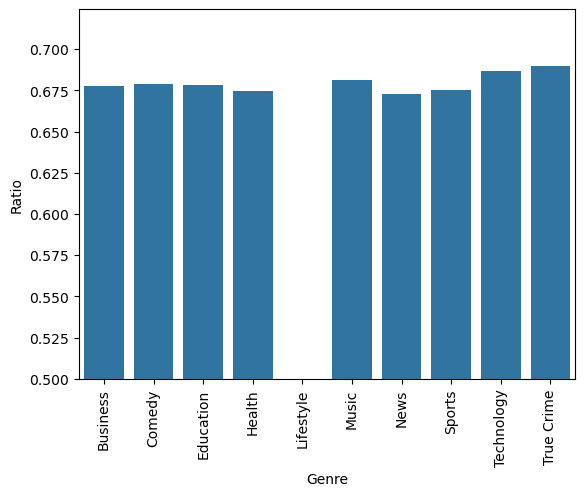

In [30]:
data['Ratio'] = data['Listening_Time_minutes'] / data['Episode_Length_minutes']
grouping_ratio = data.groupby('Genre')['Ratio'].mean()
sns.barplot(grouping_ratio)
plt.xticks(rotation=90)
plt.ylim(.5)

In [31]:
length_sort = data.sort_values('Ratio', ascending=False)
length_sort.head(50)

id         Podcast_Name Episode_Title  Episode_Length_minutes  \
150178  150178      Fashion Forward    Episode 16                0.000000   
250219  250219         Life Lessons    Episode 81                1.240000   
453791  453791           Tech Talks    Episode 63                1.480000   
642283  642283          Funny Folks    Episode 31                1.840000   
107984  107984    Detective Diaries    Episode 52                2.470000   
674029  674029          Mind & Body    Episode 85                2.470000   
486115  486115           Laugh Line    Episode 78                2.470000   
553429  553429           Laugh Line    Episode 78                2.470000   
63965    63965          Mind & Body    Episode 84               12.010000   
3859      3859       Digital Digest    Episode 90               12.090000   
391491  391491     Crime Chronicles    Episode 22               11.350000   
235546  235546          Funny Folks    Episode 19                8.900000   
583239  583239          Tech Trends    Episode 31               12.670000   
480516  480516           Laugh Line    Episode 91                6.770000   
253190  253190      Athlete's Arena    Episode 28                7.520000   
696739  696739           Tech Talks    Episode 26                8.650000   
186316  186316            Tune Time    Episode 54                6.780000   
235795  235795         Life Lessons    Episode 29                8.320000   
119498  119498     Crime Chronicles    Episode 29                8.320000   
368946  368946          Gadget Geek    Episode 71                8.320000   
197372  197372         Life Lessons    Episode 29                8.320000   
159896  159896     Crime Chronicles    Episode 29                8.320000   
225557  225557          Health Hour    Episode 22                8.700000   
288385  288385           Tech Talks     Episode 2                7.800000   
471388  471388          Tech Trends    Episode 83                7.800000   
179102  179102           Sport Spot    Episode 43                7.800000   
261166  261166      Fashion Forward    Episode 46               11.650000   
373073  373073           Innovators     Episode 7               15.380000   
311088  311088         Daily Digest    Episode 82               16.190000   
484938  484938          Funny Folks    Episode 51               24.220000   
429786  429786           Tech Talks    Episode 60               18.730000   
483905  483905      Athlete's Arena    Episode 77               32.370000   
289222  289222        Wellness Wave    Episode 68               29.730000   
26222    26222          World Watch    Episode 66                6.650000   
100375  100375        Home & Living     Episode 3               29.310000   
255882  255882           Tech Talks    Episode 80               29.620000   
154484  154484  Educational Nuggets    Episode 80               29.620000   
242960  242960           Innovators    Episode 80               29.620000   
577193  577193           Tech Talks    Episode 80               29.620000   
636453  636453        Wellness Wave    Episode 47               29.620000   
698241  698241        Home & Living    Episode 90               29.620000   
87234    87234           Tech Talks    Episode 80               29.620000   
324314  324314          Style Guide     Episode 3               29.620000   
386430  386430          Style Guide     Episode 3               29.620000   
247511  247511          Style Guide    Episode 80               29.620000   
39918    39918        Joke Junction    Episode 80               29.630000   
397310  397310         News Roundup    Episode 78               61.108864   
103629  103629         News Roundup    Episode 89               61.108864   
166711  166711        Joke Junction    Episode 74               61.348252   
136468  136468       Criminal Minds    Episode 40               61.449709   

             Genre  Host_Popularity_percentage Publication_Day  \
150178   Lifestyle

It is not impossible for a Podcast to be listened to for longer than the length of the podcast. Some listeners may rewind or rewatch. However, it is clear that there is a small number of values that go far beyond what is reasonably expected. A 5 minute podcast being listened to for 2 hours is not reasonable and therefore it is an outlier and should be removed from the dataset.


Looking at the data, we see a string of ratios that are identical right before the 2.0 ratio cutoff. These episodes across multiple podcasts were all the exact same length and the exact same amount of time listened. This is very unnatural, and could indicate bot usage or some other artificial means of listening. Dropping all values above a ratio of 2 would drop a total of 21 rows, and make the dataset more accurate.

In [32]:
data = data[data['Ratio'] < 2]
data = data.sort_values('Ratio', ascending=False)
data.head()

id    Podcast_Name Episode_Title  Episode_Length_minutes  \
397310  397310    News Roundup    Episode 78               61.108864   
103629  103629    News Roundup    Episode 89               61.108864   
166711  166711   Joke Junction    Episode 74               61.348252   
136468  136468  Criminal Minds    Episode 40               61.449709   
100722  100722  Sports Central    Episode 65               60.810536   

             Genre  Host_Popularity_percentage Publication_Day  \
397310        News                       84.09        Saturday   
103629        News                       38.68         Tuesday   
166711      Comedy                       99.59       Wednesday   
136468  True Crime                       90.01        Saturday   
100722      Sports                       59.13          Friday   

       Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
397310        Afternoon                        83.39            2.0   
103629          Morning                        29.91            0.0   
166711            Night                         6.32            1.0   
136468            Night                         0.00            1.0   
100722        Afternoon                        84.84            0.0   

       Episode_Sentiment  Listening_Time_minutes  Episode_Length_means  \
397310          Positive                  119.73             61.108864   
103629          Negative                  119.44             61.108864   
166711          Positive                  119.56             61.348252   
136468          Negative                  119.34             61.449709   
100722           Neutral                  118.06             60.810536   

        listening_labels     Ratio  
397310  (70.047, 119.97]  1.959290  
103629  (70.047, 119.97]  1.954545  
166711  (70.047, 119.97]  1.948874  
136468  (70.047, 119.97]  1.942076  
100722  (70.047, 119.97]  1.941440

Now we do the same visualization again to see if it is complete

(0.5, 0.7235936125659909)

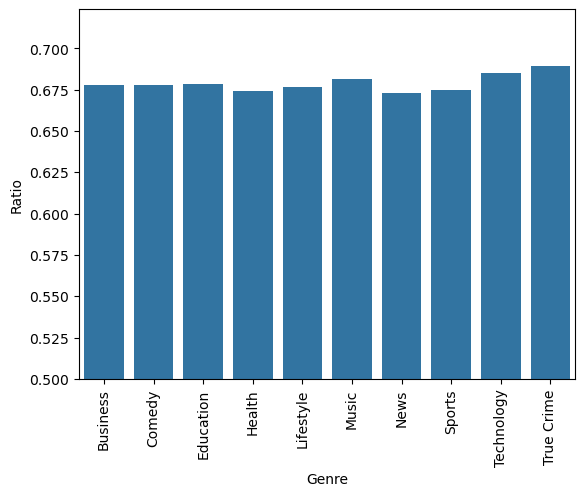

In [33]:
data['Ratio'] = data['Listening_Time_minutes'] / data['Episode_Length_minutes']
grouping_ratio = data.groupby('Genre')['Ratio'].mean()
sns.barplot(grouping_ratio)
plt.xticks(rotation=90)
plt.ylim(.5)

Nice. We do see a bit of difference in some genres. Genre is a feature that I will explore in my multivariate analysis.

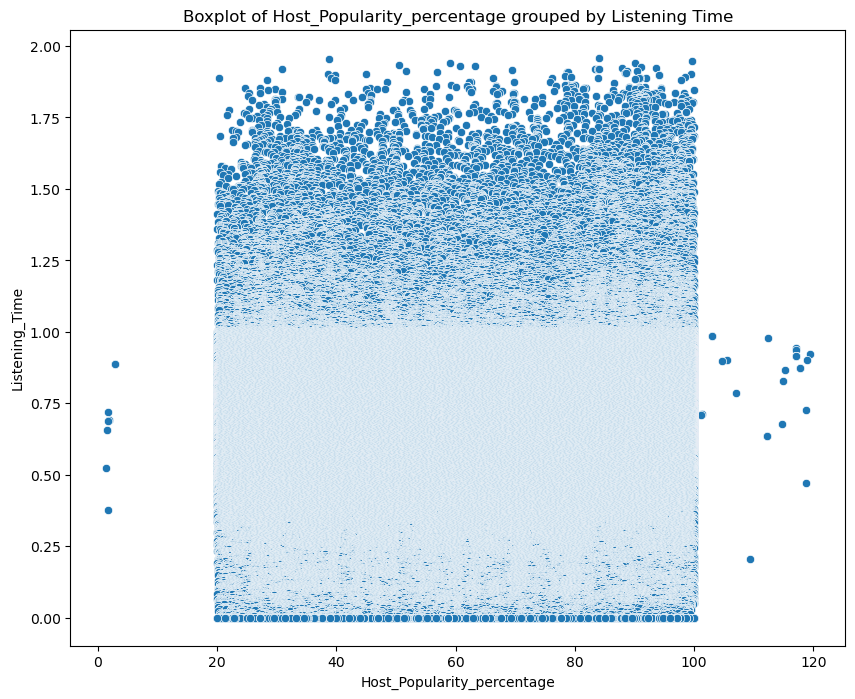

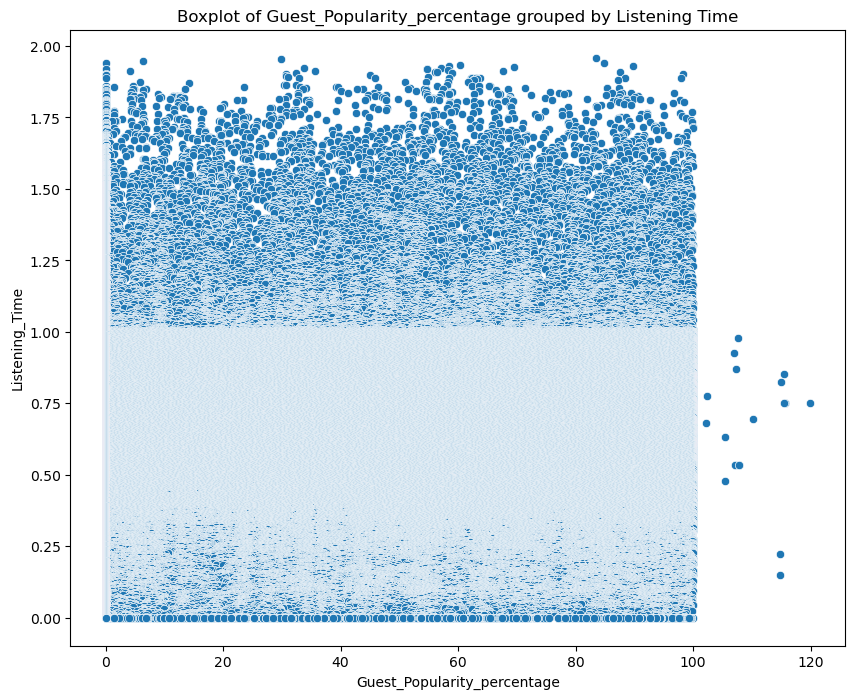

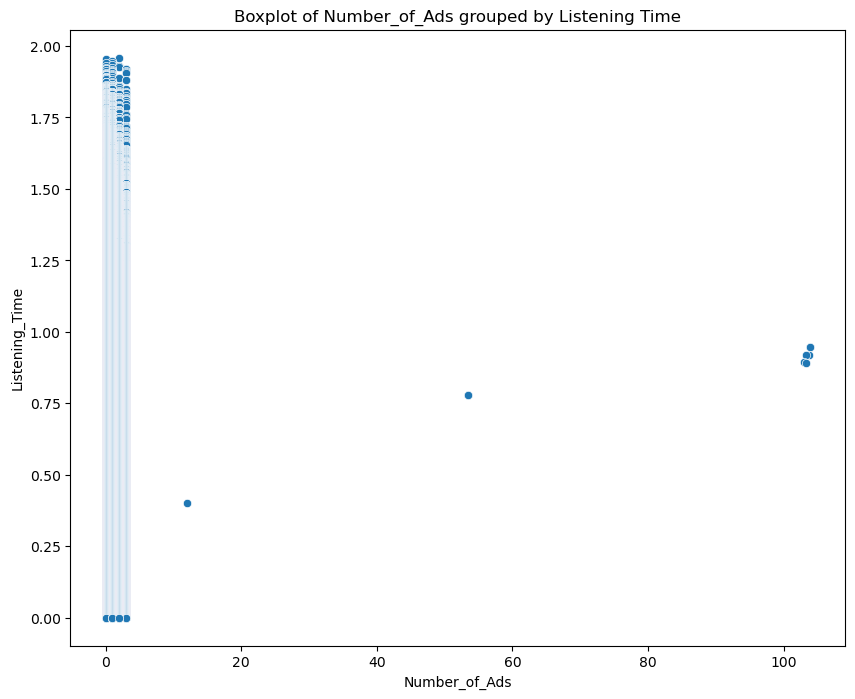

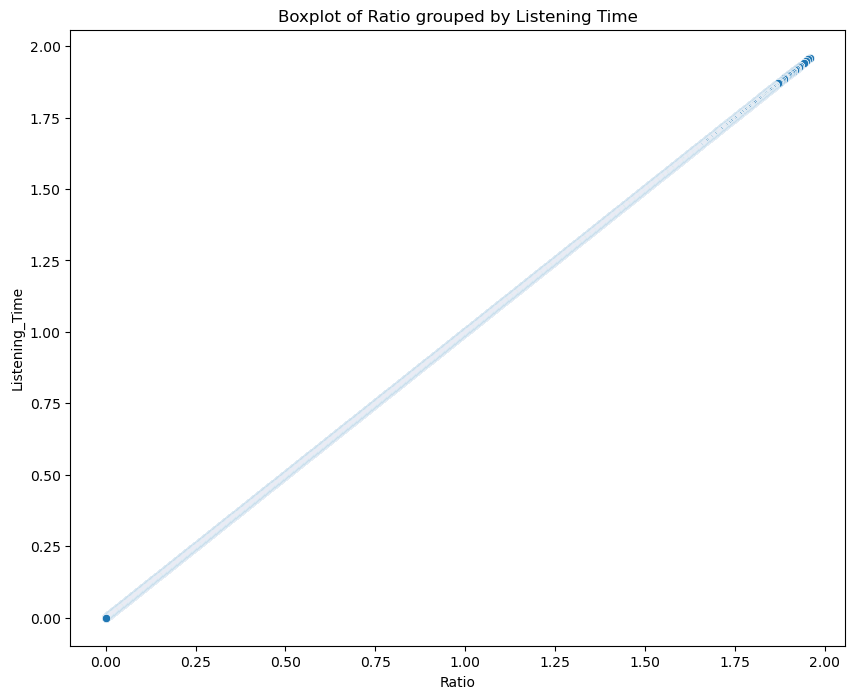

In [34]:
dogs = data[['Host_Popularity_percentage','Guest_Popularity_percentage', 'Number_of_Ads','Ratio']]
for feature in dogs:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(dogs, x=feature, y='Ratio')
    plt.xlabel(feature)
    plt.ylabel('Listening_Time')
    plt.title(f'Boxplot of {feature} grouped by Listening Time')
    plt.show()

Comparing the non-catagorical columns shows similar trends to what has already been seen. There doesn't seem to be much relationship between these columns and listening time, aside from episode length.

In [35]:
episode_group = data.groupby('Episode_Title')['Ratio'].mean()
episode_group = episode_group.reset_index()
episode_group

Episode_Title     Ratio
0      Episode 1  0.693968
1     Episode 10  0.686363
2    Episode 100  0.660065
3     Episode 11  0.687375
4     Episode 12  0.682807
..           ...       ...
95    Episode 95  0.679884
96    Episode 96  0.671339
97    Episode 97  0.674287
98    Episode 98  0.657338
99    Episode 99  0.682846

[100 rows x 2 columns]

In [36]:
def remove_string_from_column(df, column_name, string_to_remove):
    """
    Removes an identical string from all rows in a specified column of a Pandas DataFrame.
    Args:
        df (pd.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column to modify.
        string_to_remove (str): The string to remove from each row in the column.
    Returns:
        pd.DataFrame: The modified DataFrame.
    """
    df[column_name] = df[column_name].str.replace(string_to_remove, '', regex=False)
    return df

rem_string = 'Episode '
episode_group = remove_string_from_column(episode_group,'Episode_Title',rem_string)
#returns a episodes as strings, convert to ints for sorting
episode_group['Episode_Title'] = episode_group['Episode_Title'].astype(int)
#sort by the now int column
episode_group = episode_group.sort_values('Episode_Title')
episode_group

Episode_Title     Ratio
0               1  0.693968
12              2  0.674725
23              3  0.659446
34              4  0.660103
45              5  0.690994
..            ...       ...
96             96  0.671339
97             97  0.674287
98             98  0.657338
99             99  0.682846
2             100  0.660065

[100 rows x 2 columns]

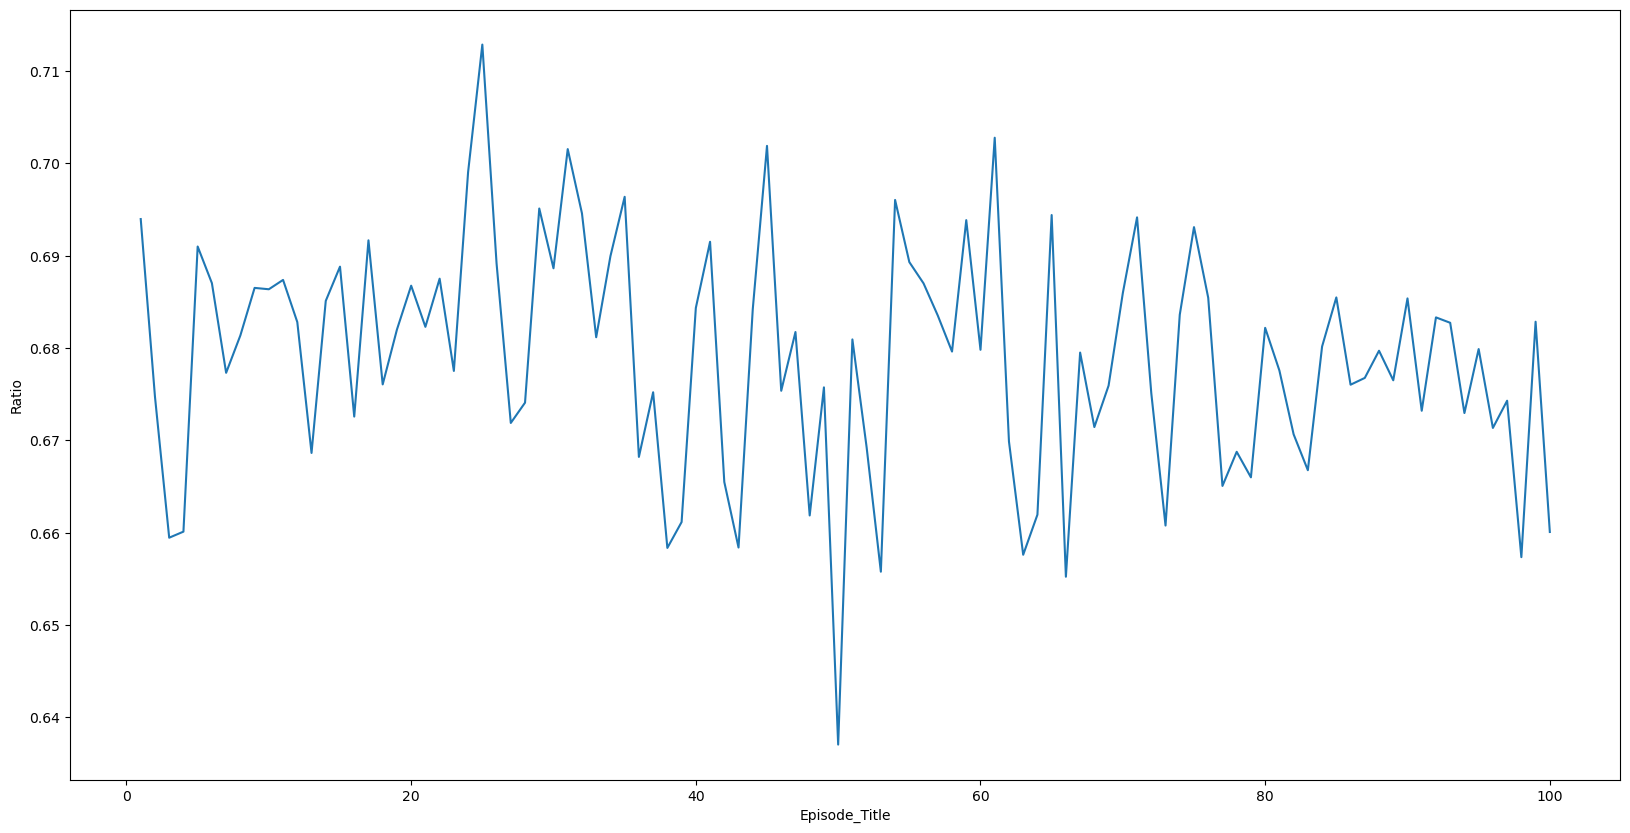

In [37]:
#because this is episodic, aka time-based, a lineplot is a good choice
plt.figure(figsize=(20,10))
sns.lineplot(episode_group, x='Episode_Title', y='Ratio')
plt.show()

There seems to be a lot of variance between episodes but it is tough to see an

<Axes: xlabel='Ratio', ylabel='Title_Groups'>

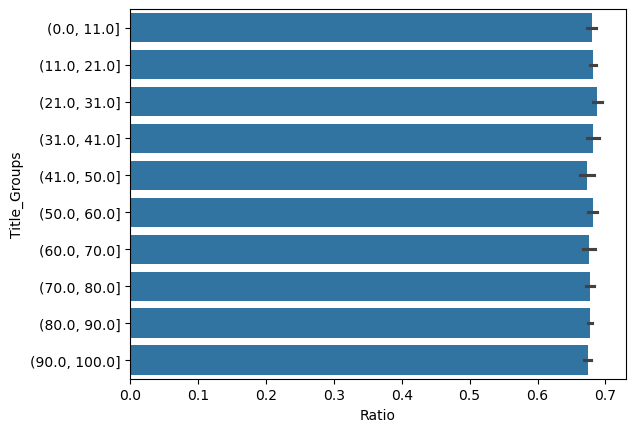

In [38]:
episode_group['Title_Groups'] = pd.qcut(episode_group['Episode_Title'], 10, precision=0)
sns.barplot(episode_group, y='Title_Groups', x='Ratio')

It looks like while there a fluctions between episodes, each group stays remakably consistant, now matter what cut you make. Episode_Title has no consistent predictive quality and can be dropped.

### Multivariate Analysis



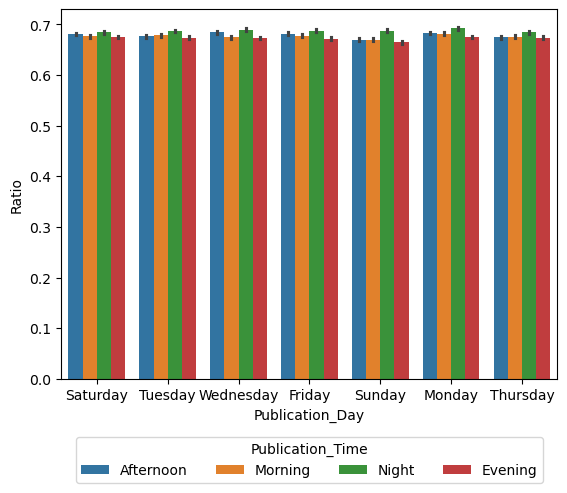

In [39]:
sns.barplot(data, x='Publication_Day', y='Ratio', hue='Publication_Time')
plt.legend(title = 'Publication_Time',loc = 'lower center',bbox_to_anchor=(.5,-.3), ncol=4)
plt.show()

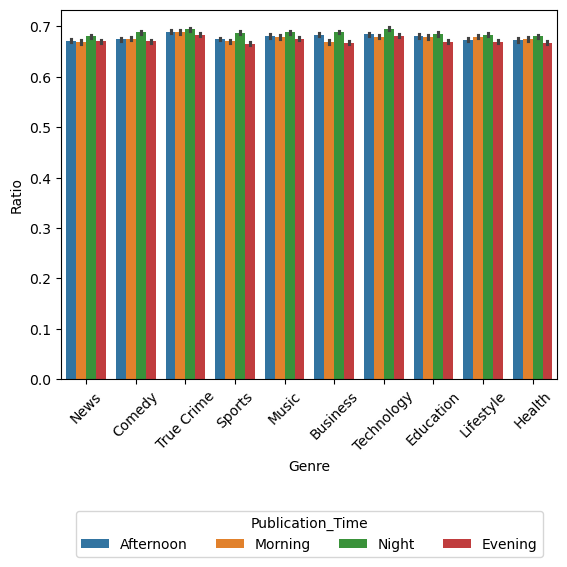

In [40]:
sns.barplot(data, x = 'Genre', y= 'Ratio', hue='Publication_Time')
plt.xticks(rotation=45)
plt.legend(title = 'Publication_Time',loc = 'lower center',bbox_to_anchor=(.5,-.5), ncol=4)
plt.show()

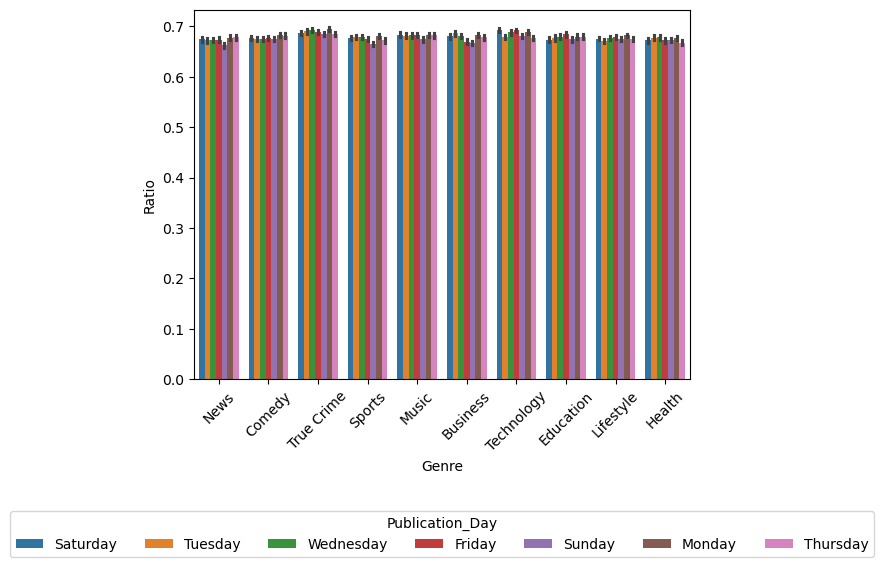

In [41]:
sns.barplot(data, x = 'Genre', y= 'Ratio', hue='Publication_Day')
plt.xticks(rotation=45)
plt.legend(title = 'Publication_Day',loc = 'lower center',bbox_to_anchor=(.5,-.5), ncol=7)
plt.show()

<Figure size 2000x1000 with 0 Axes>

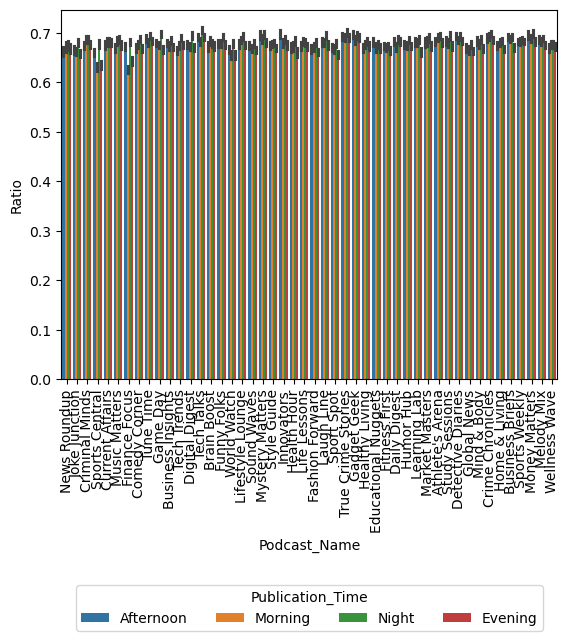

<Figure size 2000x1000 with 0 Axes>

In [42]:
sns.barplot(data, x = 'Podcast_Name', y= 'Ratio', hue='Publication_Time')
plt.xticks(rotation=90)
plt.legend(title = 'Publication_Time',loc = 'lower center',bbox_to_anchor=(.5,-.7), ncol=4)
plt.figure(figsize=(20,10))

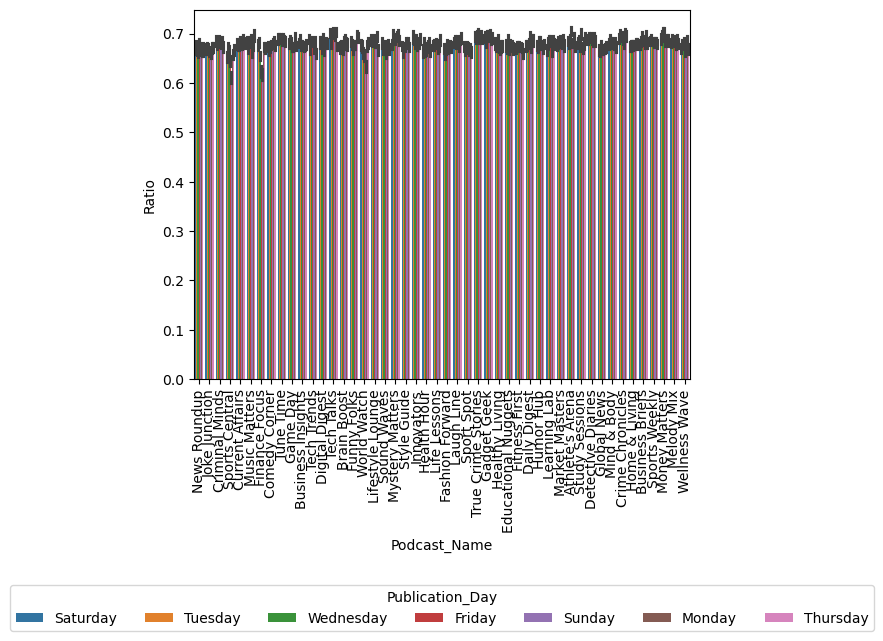

<Figure size 2000x1000 with 0 Axes>

In [43]:
sns.barplot(data, x = 'Podcast_Name', y= 'Ratio', hue='Publication_Day')
plt.xticks(rotation=90)
plt.legend(title = 'Publication_Day',loc = 'lower center',bbox_to_anchor=(.5,-.7), ncol=7)
plt.figure(figsize=(20,10))
plt.show()

There isn't much to see across the different podcasts, but it is notable that podcasts published on Sundays seem to have lower listening times across the board, and in some podcasts this drop is significant. It may be worth keeping this column if converted to binary boolean. ex: (Is_Sunday=1, Is_Not_Sunday = 0)

Movi

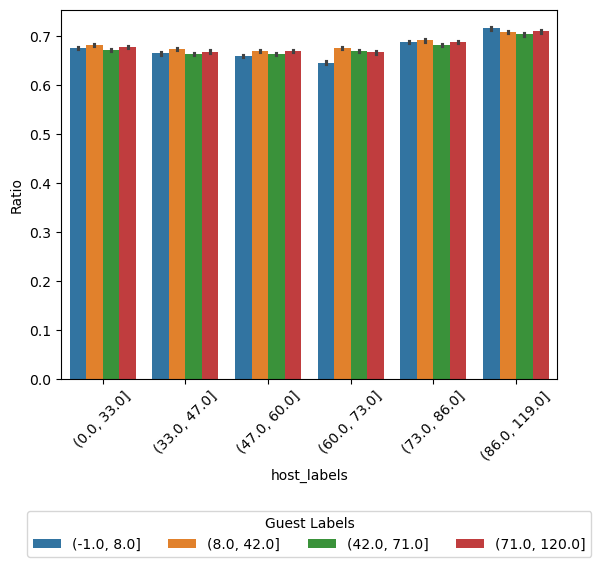

In [44]:
data["host_labels"] = pd.qcut(data['Host_Popularity_percentage'],6,precision=0)
data["guest_labels"] = pd.qcut(data['Guest_Popularity_percentage'],4, precision=0)
sns.barplot(data,x='host_labels', y='Ratio', hue='guest_labels')
plt.legend(title = 'Guest Labels',loc = 'lower center',bbox_to_anchor=(.5,-.5), ncol=7)
plt.xticks(rotation=45)
plt.show()

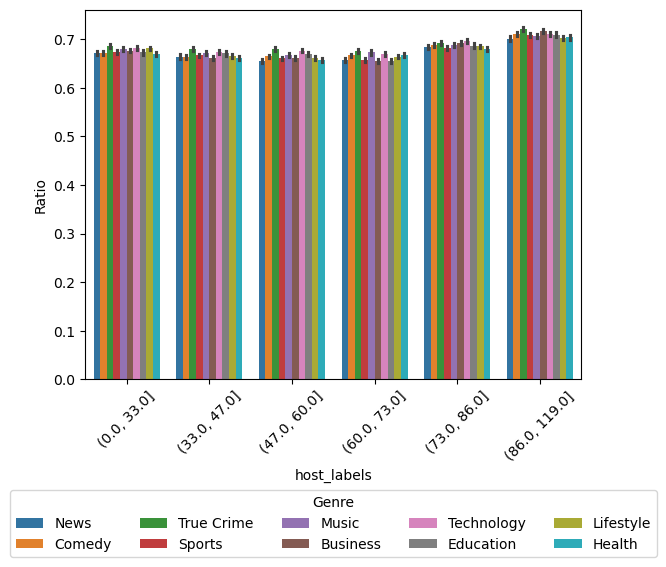

In [45]:
sns.barplot(data,x='host_labels', y='Ratio', hue='Genre')
plt.legend(title = 'Genre',loc = 'lower center',bbox_to_anchor=(.5,-.5), ncol=5)
plt.xticks(rotation=45)
plt.show()

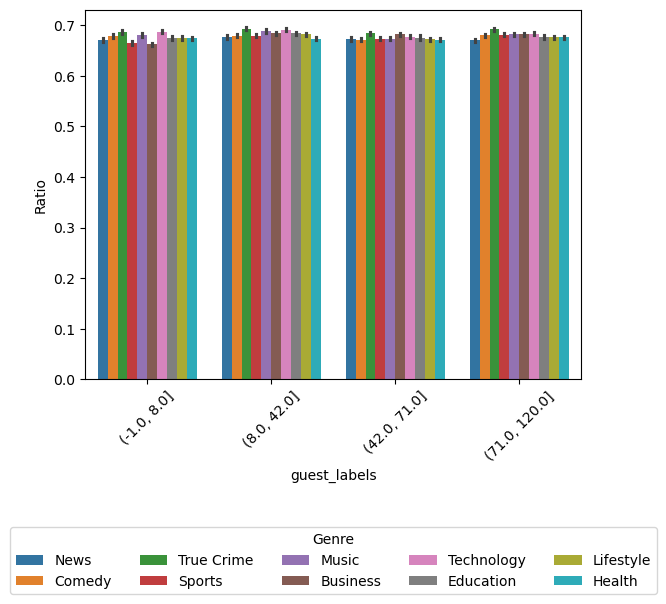

In [46]:
sns.barplot(data,x='guest_labels', y='Ratio', hue='Genre')
plt.legend(title = 'Genre',loc = 'lower center',bbox_to_anchor=(.5,-.6), ncol=5)
plt.xticks(rotation=45)
plt.show()

Host Popularity in? Guest Popularity out.

We saw earlier that Number_of_Ads had a few huge outliers. When looking at the data 99% of podcasts have 3 Ads or less, regardless of length. While it would be simple to make this the cutoff, Ad growth is inevitable and cutting off at 3 could make outdate our model when more Ads in podcasts is normalized. I am going double it and cutoff at 6.

In [47]:
data = data[data['Number_of_Ads'] < 6]
ad_sorted = data.sort_values('Number_of_Ads', ascending=False)
ad_sorted.head(25)

id      Podcast_Name Episode_Title  Episode_Length_minutes  \
543877  543877      Life Lessons    Episode 48               73.730000   
82173    82173     Joke Junction    Episode 88               89.640000   
359030  359030  Crime Chronicles    Episode 67               91.160000   
285326  285326       Mind & Body    Episode 27               79.260000   
168510  168510     Comedy Corner    Episode 78               39.400000   
518520  518520        Laugh Line    Episode 82               50.850000   
352422  352422        Laugh Line    Episode 86               20.690000   
314796  314796        Melody Mix    Episode 37               40.460000   
577847  577847   Mystery Matters    Episode 69               74.880000   
92474    92474        Innovators    Episode 31              108.720000   
48799    48799       Tech Trends    Episode 55              105.540000   
409482  409482     Sports Weekly    Episode 61               45.810000   
14214    14214         Humor Hub   Episode 100               26.590000   
331142  331142     Sports Weekly    Episode 23               99.840000   
284756  284756    Sports Central    Episode 77               13.690000   
277691  277691    Criminal Minds    Episode 40               33.570000   
665606  665606     Wellness Wave    Episode 23              108.470000   
131102  131102   Mystery Matters    Episode 64               41.450000   
96375    96375     Music Matters    Episode 87               56.780000   
133408  133408     Fitness First    Episode 69               30.160000   
423159  423159    Criminal Minds     Episode 6               61.449709   
444005  444005       Gadget Geek     Episode 1              108.550000   
404759  404759     Fitness First    Episode 50               94.840000   
64459    64459       Sound Waves    Episode 61               84.130000   
446474  446474  Crime Chronicles    Episode 56               66.095907   

             Genre  Host_Popularity_percentage Publication_Day  \
543877   Lifestyle                       68.36         Tuesday   
82173       Comedy                       38.32        Saturday   
359030  True Crime                       62.53          Friday   
285326      Health                       54.86          Monday   
168510      Comedy                       72.19        Thursday   
518520      Comedy                       80.80          Sunday   
352422      Comedy                       36.53          Monday   
314796       Music                       51.58          Friday   
577847  True Crime                       84.54          Friday   
92474   Technology                       23.37          Sunday   
48799   Technology                       54.75        Thursday   
409482      Sports                       21.82        Thursday   
14214       Comedy                       75.20        Saturday   
331142      Sports                       33.58          Sunday   
284756      Sports                       32.50        Saturday   
277691  True Crime                       33.97          Sunday   
665606      Health                       54.79        Saturday   
131102  True Crime                       41.51       Wednesday   
96375        Music                       75.06          Sunday   
133408      Health                       63.05          Friday   
423159  True Crime                       68.85          Sunday   
444005  Technology                       36.36          Sunday   
404759      Health                       70.73          Monday   
64459        Music                       53.26        Saturday   
446474  True Crime                       80.75         Tuesday   

       Publication_Time  Guest_Popularity_percentage  Number_of_Ads  \
543877          Morning                         0.00            3.0   
82173           Morning                        73.57            3.0   
359030          Evening                        19.25            3.0   
285326          Evening                        99.45            3.0   
168510        A

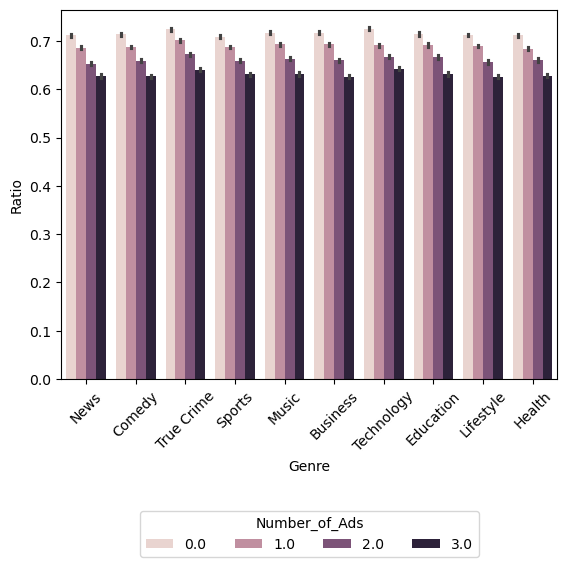

In [48]:
sns.barplot(data, x='Genre', y='Ratio', hue='Number_of_Ads')
plt.xticks(rotation=45)
plt.legend(title = 'Number_of_Ads',loc = 'lower center',bbox_to_anchor=(.5,-.5), ncol=4)

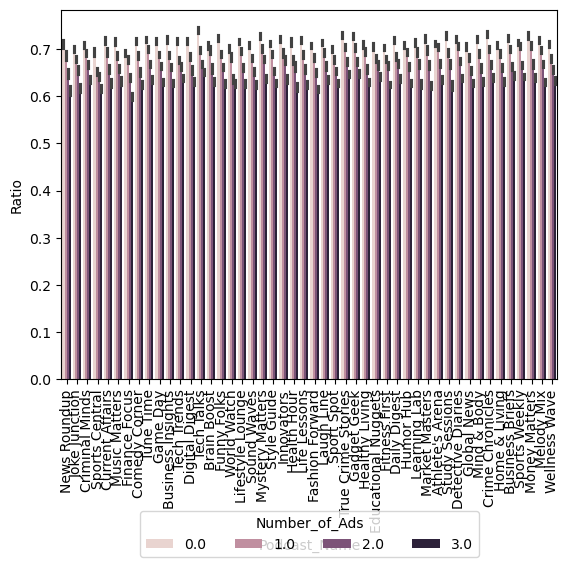

In [49]:
sns.barplot(data, x='Podcast_Name', y='Ratio', hue='Number_of_Ads')
plt.xticks(rotation=90)
plt.legend(title = 'Number_of_Ads',loc = 'lower center',bbox_to_anchor=(.5,-.5), ncol=4)

This charts readablility isn't great, but we see a clear pattern; across all podcasts 0-1 ads has a consistent 14% greater listening ratio than those with 2-3 ads. Number_of_Ads is a column we must keep.

Next I am going to examine the relationship between each Podcast, it's genre, and how it relates to our listening Ratio

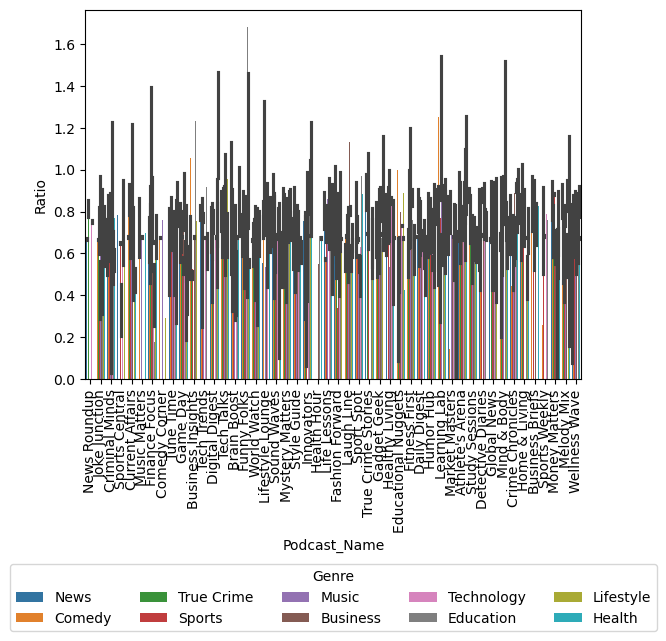

In [50]:
sns.barplot(data, x='Podcast_Name',y='Ratio', hue='Genre')
plt.xticks(rotation=90)
plt.legend(title = 'Genre',loc = 'lower center',bbox_to_anchor=(.5,-.7), ncol=5)

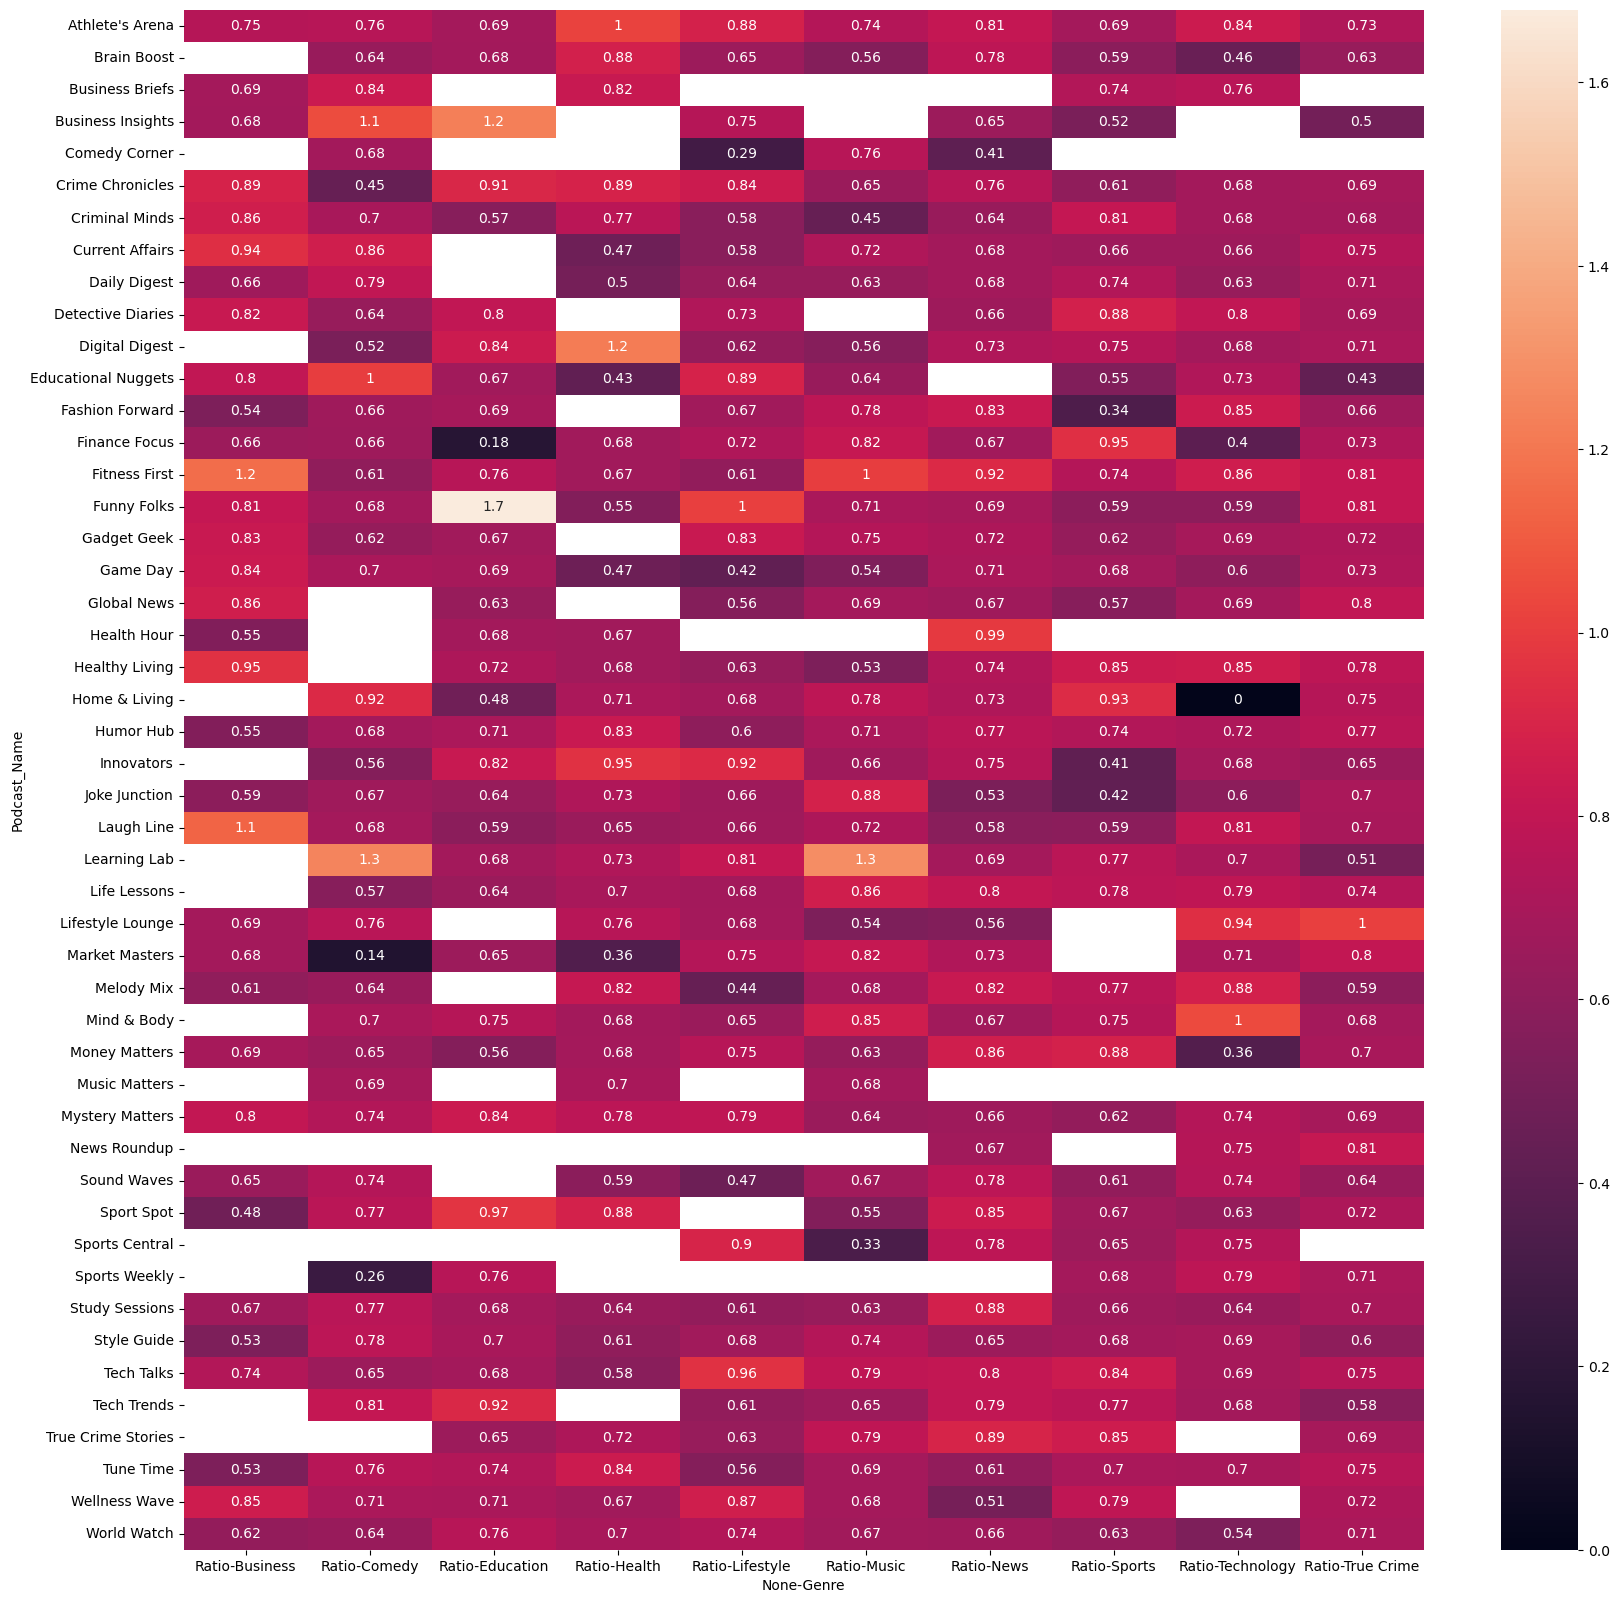

In [51]:
podcast_genre = data.groupby(['Podcast_Name','Genre'])['Ratio'].mean().to_frame()
podcast_genre = podcast_genre.unstack('Genre')
plt.figure(figsize=(20,20))
sns.heatmap(podcast_genre,annot=True)
plt.show()

It looks like there might be some predictive qualities hidden within this data as we definitly see changes in the mean ratio. This does beg the question, how representivive is each cell in this heatmap. I predict with some minor tweaks to our groupings, we can create a similar graphic that shows the count of each cell.

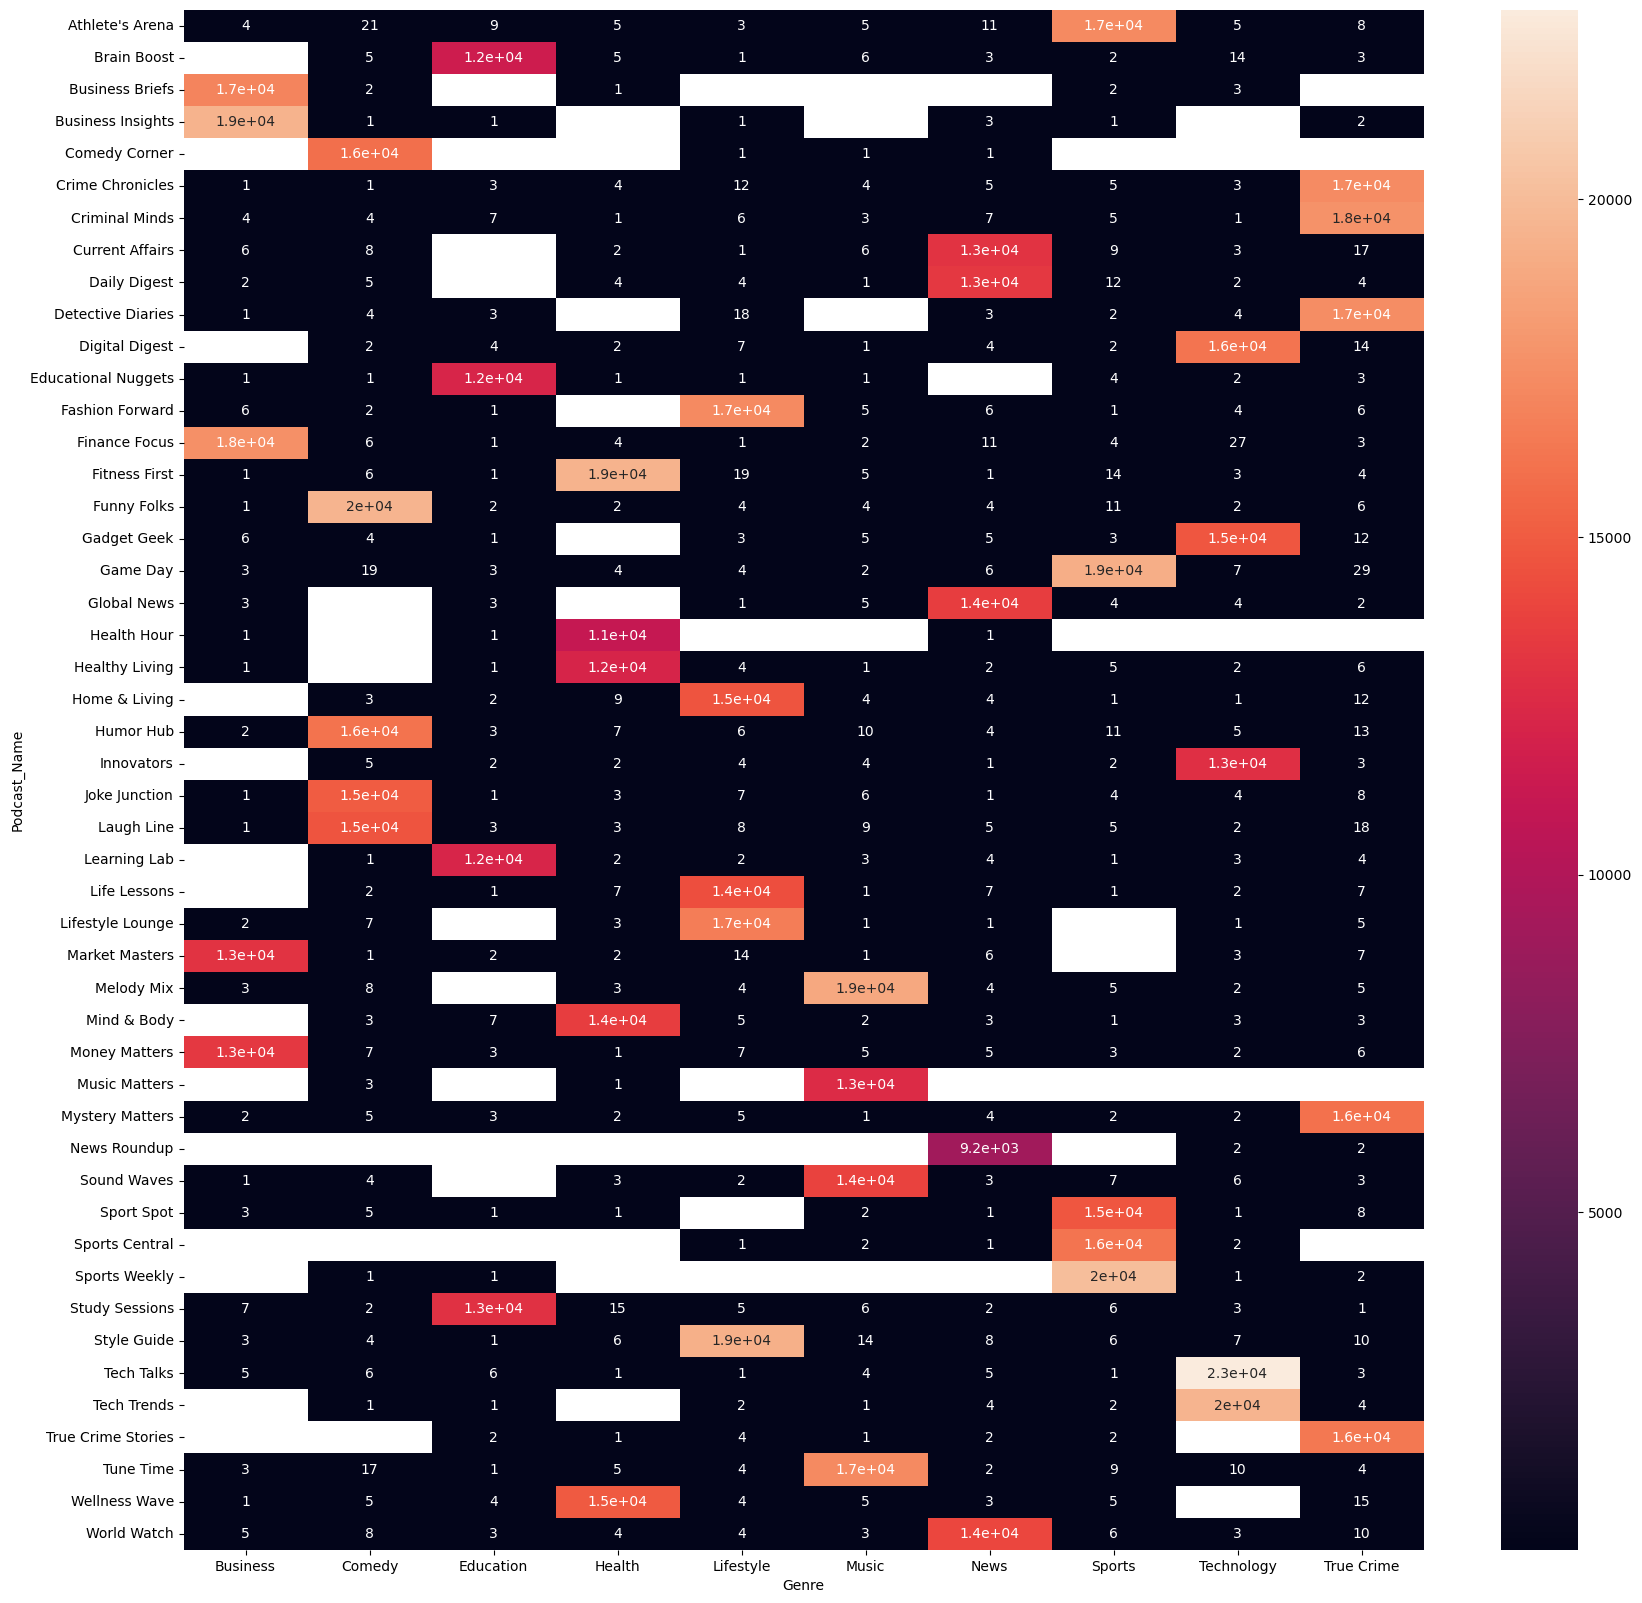

In [52]:
podcast_genre_count = data.groupby('Podcast_Name')['Genre'].value_counts()
podcast_genre_count = podcast_genre_count.unstack('Genre')
plt.figure(figsize=(20,20))
sns.heatmap(podcast_genre_count, annot = True)
plt.show()

That settles that. Podcasts largely focus on 1 genre and devations from this are so scarce that it cannot be used predictively. I believe this puts the final nail in the coffin for both Podcast_Name and Genre. If we capture over 90% of Podcast_Name data within Genre, and we found no predictive qualities within genre, both columns can be removed in the cleaning process.

The last column in question is our Episode_Sentiment column. Analysis will need to show the relationship between this column and our Ratio. Because 

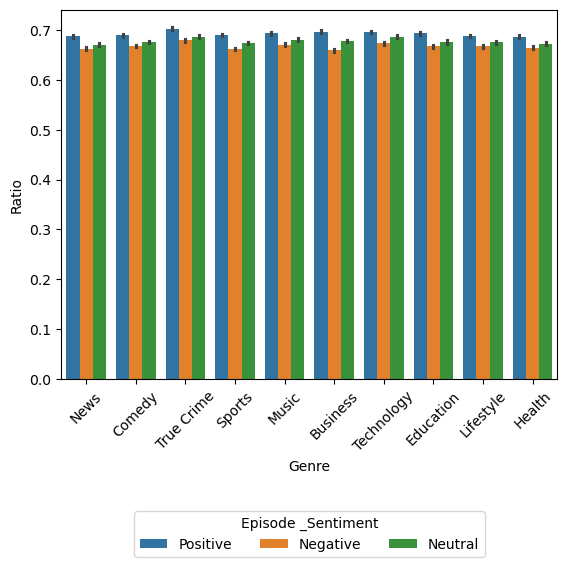

In [53]:
sns.barplot(data, x='Genre', y='Ratio', hue='Episode_Sentiment')
plt.xticks(rotation = 45)
plt.legend(title = 'Episode _Sentiment',loc = 'lower center',bbox_to_anchor=(.5,-.5), ncol=3)
plt.show()

<Axes: xlabel='Guest_Popularity_percentage', ylabel='Host_Popularity_percentage'>

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


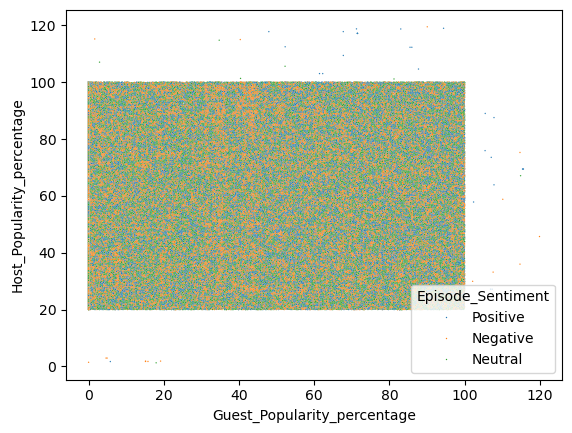

In [54]:
sns.scatterplot(data, x='Guest_Popularity_percentage', y='Host_Popularity_percentage',hue='Episode_Sentiment',s=1)

<Axes: xlabel='Episode_Sentiment', ylabel='Ratio'>

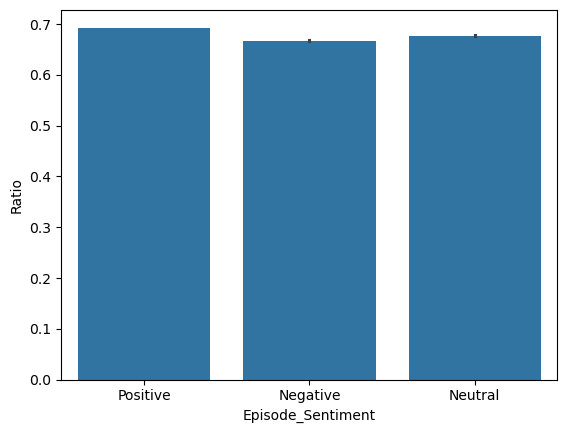

In [55]:
sns.barplot(data,x='Episode_Sentiment',y='Ratio')

/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_73447/3865163622.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  host_sent = data.groupby('host_labels')['Sentiment_Values'].sum()


<Axes: xlabel='host_labels'>

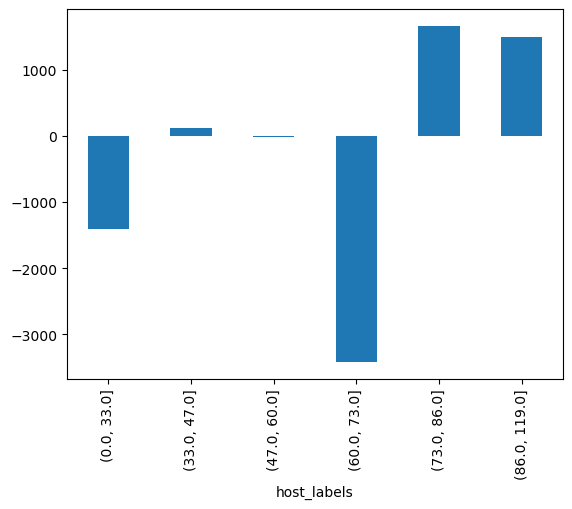

In [56]:
data['Sentiment_Values'] = data['Episode_Sentiment'].map({'Positive':1,'Neutral':0,'Negative':-1})
host_sent = data.groupby('host_labels')['Sentiment_Values'].sum()
host_sent.plot(kind='bar')

/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_73447/3689227618.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  guest_sent = data.groupby('guest_labels')['Sentiment_Values'].sum()


<Axes: xlabel='guest_labels'>

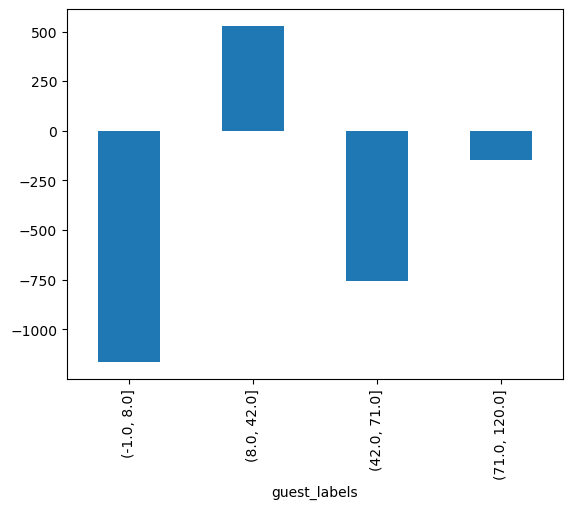

In [57]:
guest_sent = data.groupby('guest_labels')['Sentiment_Values'].sum()
guest_sent.plot(kind='bar')

In [58]:
sentiment_group = data.groupby('host_labels')['Episode_Sentiment'].value_counts()
sentiment_group

/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_73447/2053666090.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_group = data.groupby('host_labels')['Episode_Sentiment'].value_counts()


host_labels    Episode_Sentiment
(0.0, 33.0]    Negative             42324
               Neutral              41806
               Positive             40926
(33.0, 47.0]   Neutral              41940
               Positive             41565
               Negative             41446
(47.0, 60.0]   Neutral              42204
               Negative             41417
               Positive             41404
(60.0, 73.0]   Negative             43264
               Neutral              41856
               Positive             39844
(73.0, 86.0]   Positive             42387
               Neutral              41909
               Negative             40720
(86.0, 119.0]  Positive             42438
               Neutral              41560
               Negative             40935
Name: count, dtype: int64

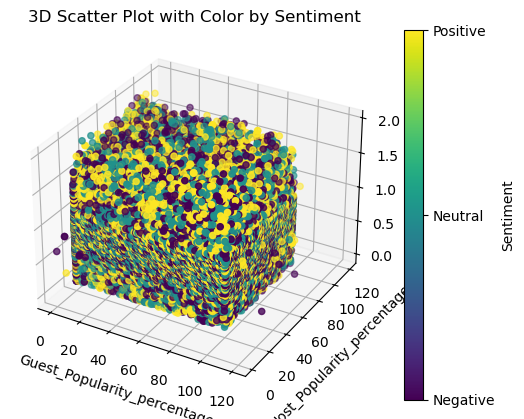

In [59]:
# plot a 3D plot to get a sense of "distance" b/w clusters
# include a parameter to view data-points in clusters

# Map species to numeric values
sentiment = {'Negative': -1, 'Neutral': 0, 'Positive': 1}
data['SentimentNumeric'] = data['Episode_Sentiment'].map(sentiment)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data['Guest_Popularity_percentage'], data['Host_Popularity_percentage'], data['Ratio'], c=data['SentimentNumeric'], cmap='viridis')
ax.set_xlabel('Guest_Popularity_percentage')
ax.set_ylabel('Host_Popularity_percentage')
ax.set_zlabel('Ratio')
ax.set_title('3D Scatter Plot with Color by Sentiment')
cbar = plt.colorbar(sc)
cbar.set_ticks([-1, 0, 1])
cbar.set_ticklabels(sentiment.keys())
cbar.set_label('Sentiment')
plt.show()

Unfortuntetly our dataset is extremely dense and it makes it difficult to find any patterns. This does give me an idea. If I create seperate dataframes for each catagory in Episode_Sentiment, totaling 3, I could use a KDE plot to see levels of density inside each catagory and see if there is a combination of features that can be used to predict sentiment.

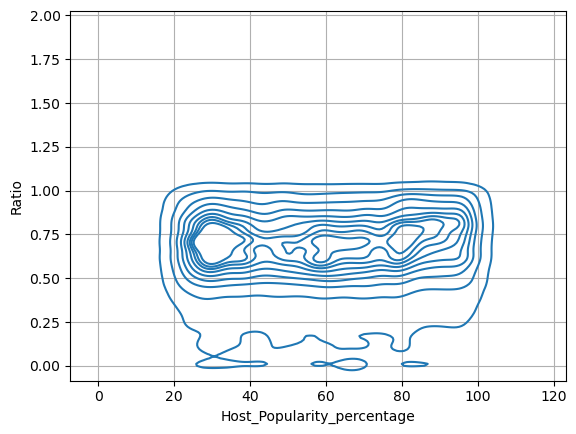

In [60]:
neutral = data[data['Episode_Sentiment'] == 'Neutral']
sns.kdeplot(neutral, x=data['Host_Popularity_percentage'], y='Ratio')
plt.grid(True)
plt.show()

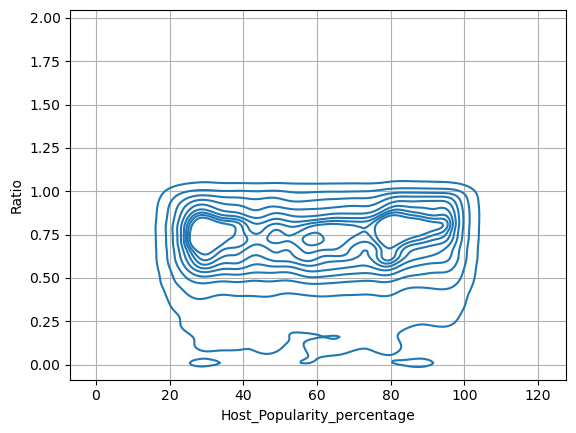

In [62]:
positive = data[data['Episode_Sentiment'] == 'Positive']
sns.kdeplot(positive, x=data['Host_Popularity_percentage'], y='Ratio',)
plt.grid(True)
plt.show()

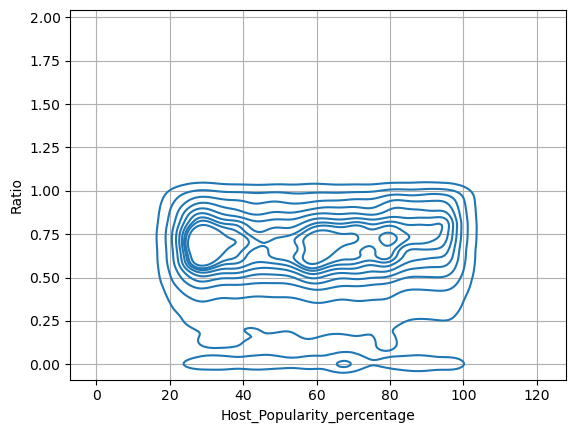

In [61]:
negative = data[data['Episode_Sentiment'] == 'Negative']
sns.kdeplot(negative, x=data['Host_Popularity_percentage'], y='Ratio')
plt.grid(True)
plt.show()

The neutral graph provides a good baseline and what we see actually leads me to the conclusion that Host popularity is a column to keep. This reasoning is based on the high popularity cluster moving upward on the Y-Axis by roughly 10%. This means that episode with high host popularity and positive sentiment have a higher listening ratio than episodes with high host popularity and low sentiment. The result in a model would be episodes with higher host popularity would be predicted to have positive sentiment and as a result a slightly higher listening time. This alone is not enough to predict sentiment, however.

Next I will look into Guest_Popularity_percentage to see if there is anything there

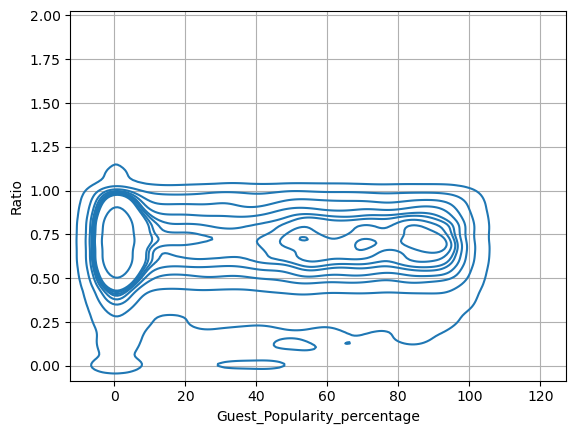

In [72]:
sns.kdeplot(neutral, x=data['Guest_Popularity_percentage'], y='Ratio',)
#show gridlines to make it easier to distinguish clusters coordinates
plt.grid(True)
plt.show()

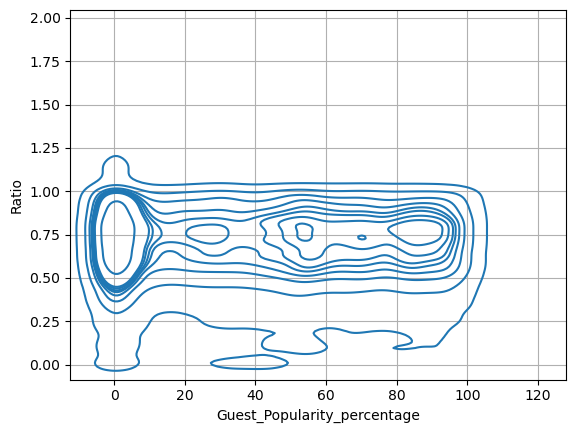

In [63]:
sns.kdeplot(positive, x=data['Guest_Popularity_percentage'], y='Ratio',)
#show gridlines to make it easier to distinguish clusters coordinates
plt.grid(True)
plt.show()

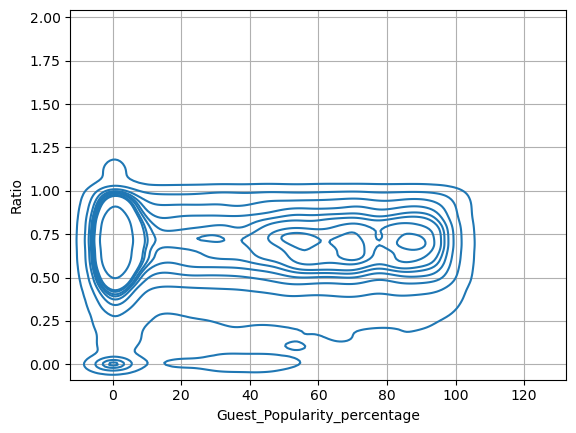

In [64]:
sns.kdeplot(negative, x=data['Guest_Popularity_percentage'], y='Ratio',)
plt.grid(True)
plt.show()

We do see movement in the clusters along the X-axis, suprisingly showng that episodes with popularity scores of 30-80 were more likely to have negative sentiment because of the larger clusters there. We also see movement along the Y-axis in our positve values. This is once again proving that sentiment is an important catagory  when predicting listening time.

<Axes: xlabel='Episode_Sentiment'>

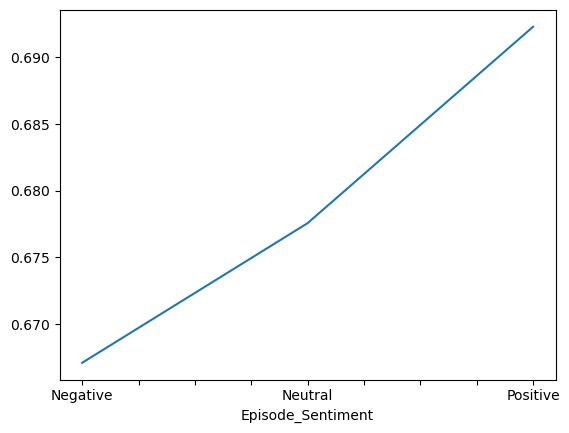

In [83]:
data['Combo_Popularity'] = data['Guest_Popularity_percentage'] + data['Host_Popularity_percentage']
data.groupby('Episode_Sentiment')['Ratio'].mean().plot()

/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_73447/3683061247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive['DayNumeric'] = data['Publication_Day'].map(days_num)


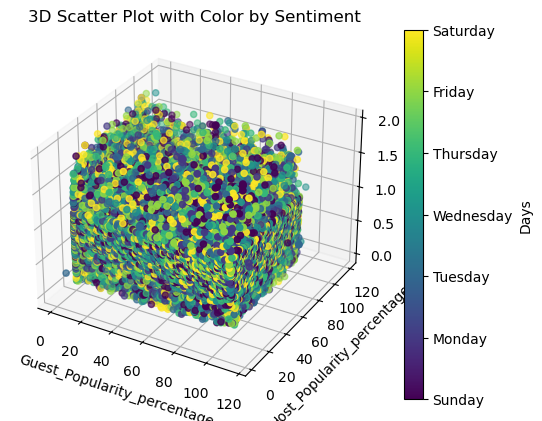

In [65]:
days_num = {'Sunday':0,'Monday':1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
positive['DayNumeric'] = data['Publication_Day'].map(days_num)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(positive['Guest_Popularity_percentage'], positive['Host_Popularity_percentage'], positive['Ratio'], c=positive['DayNumeric'], cmap='viridis')
ax.set_xlabel('Guest_Popularity_percentage')
ax.set_ylabel('Host_Popularity_percentage')
ax.set_zlabel('Ratio')
ax.set_title('3D Scatter Plot with Color by Sentiment')
cbar = plt.colorbar(sc)
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
cbar.set_ticklabels(days_num.keys())
cbar.set_label('Days')
plt.show()

/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_73447/216460739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative['DayNumeric'] = data['Publication_Day'].map(days_num)


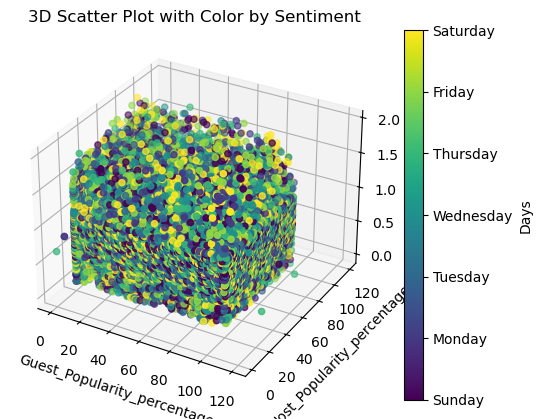

In [66]:
negative['DayNumeric'] = data['Publication_Day'].map(days_num)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(negative['Guest_Popularity_percentage'], negative['Host_Popularity_percentage'], negative['Ratio'], c=negative['DayNumeric'], cmap='viridis')
ax.set_xlabel('Guest_Popularity_percentage')
ax.set_ylabel('Host_Popularity_percentage')
ax.set_zlabel('Ratio')
ax.set_title('3D Scatter Plot with Color by Sentiment')
cbar = plt.colorbar(sc)
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
cbar.set_ticklabels(days_num.keys())
cbar.set_label('Days')
plt.show()

/var/folders/t3/tq1z8cy535bck4xjwkvc0_xh0000gn/T/ipykernel_73447/1996180170.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative['Time_Numeric'] = data['Time_Numeric']


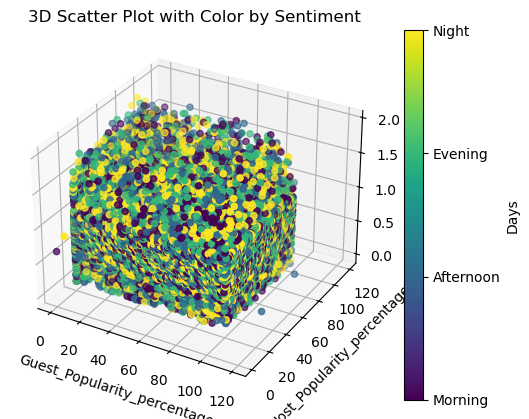

In [71]:
time_num = {'Morning':0,'Afternoon':1,'Evening':2, 'Night':3}
data['Time_Numeric'] = data['Publication_Time'].map(time_num)
negative['Time_Numeric'] = data['Time_Numeric']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(negative['Guest_Popularity_percentage'], negative['Host_Popularity_percentage'], negative['Ratio'], c=negative['Time_Numeric'], cmap='viridis')
ax.set_xlabel('Guest_Popularity_percentage')
ax.set_ylabel('Host_Popularity_percentage')
ax.set_zlabel('Ratio')
ax.set_title('3D Scatter Plot with Color by Sentiment')
cbar = plt.colorbar(sc)
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(time_num.keys())
cbar.set_label('Days')
plt.show()